# **LOAN LENDING CASE STUDY - MC61**

## Problem Statement

---
**The Lending Club**, a marketplace of consumer finance in which consumers can access different forms of loans. It operates by pairing borrowers looking for a loan to lenders interested in lending money and receiving a profit.

Upon receiving of a loan application, the company must evaluate the applicant’s profile for loan approval. Nevertheless, lending loans to 'risky' applicants is the largest cause of financial loss known as credit loss like most other lending companies. When borrowers refuse to pay or default on their loans, credit loss is what a lender loses. For that matter, 'charged-off' customers are understood as 'defaulters'.

Credit loss minimisation is the primary aim of this exercise. Credit loss results from two possible scenarios:

1. **Applicants expected to pay back loan**: these will bring income to the company through interest charged on them. Losing such clients would mean loss of revenue.

2. **Potential defaulters**: They may be among those requesting loans. Approving such applications may cost the firm some money.

---

## Objectives

---

This case study aims at finding the risky candidates for loans. As a result, it is possible to minimize the number of loans permitted that could potentially default thus decreasing credit loss rates. This will be achieved by Exploratory Data Analysis (EDA) using the provided dataset.

By spotting these risky loan applicants, we can bring down credit losses by far much more. This case study is designed to reduce credit loss.

The firm in other words wants to know what drives loan default through driver variables. These are variables which have a huge possibility of leading to defaulter sship. By doing this, it will enable the company to make informed decisions about its portfolio and risk assessment and hence make better lending decisions.

---

## IMPORTING REQUIRED LIBRARIES

In [6]:
#ignore warnings
import warnings
warnings.filterwarnings(action="ignore")

In [7]:
#Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown
import matplotlib.patches as patches

In [8]:
#loading the data into a DataFrame
loan = pd.read_csv("loan.csv")

In [9]:
#I want to see all the columns and rows, by default jyupter notebook displays 20 columns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [10]:
#first 5 rows
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [11]:
# understanding the dataset
rows, column = loan.shape
print(f"The Loan Dataframe contains {rows} rows and {column} columns")

#getting dtype of columns
def get_col_dtype(df, specific_columns = None):
  col_list = df.columns.to_list()
  if specific_columns:
    col_list = [col for col in col_list if col in specific_columns]
  for columns in col_list:
    col_type = df[columns].dtype
    print(f"Column '{columns}' is of '{col_type}'")


The Loan Dataframe contains 39717 rows and 111 columns


In [12]:
get_col_dtype(loan)

Column 'id' is of 'int64'
Column 'member_id' is of 'int64'
Column 'loan_amnt' is of 'int64'
Column 'funded_amnt' is of 'int64'
Column 'funded_amnt_inv' is of 'float64'
Column 'term' is of 'object'
Column 'int_rate' is of 'object'
Column 'installment' is of 'float64'
Column 'grade' is of 'object'
Column 'sub_grade' is of 'object'
Column 'emp_title' is of 'object'
Column 'emp_length' is of 'object'
Column 'home_ownership' is of 'object'
Column 'annual_inc' is of 'float64'
Column 'verification_status' is of 'object'
Column 'issue_d' is of 'object'
Column 'loan_status' is of 'object'
Column 'pymnt_plan' is of 'object'
Column 'url' is of 'object'
Column 'desc' is of 'object'
Column 'purpose' is of 'object'
Column 'title' is of 'object'
Column 'zip_code' is of 'object'
Column 'addr_state' is of 'object'
Column 'dti' is of 'float64'
Column 'delinq_2yrs' is of 'int64'
Column 'earliest_cr_line' is of 'object'
Column 'inq_last_6mths' is of 'int64'
Column 'mths_since_last_delinq' is of 'float64'


In [13]:
def null_col_count(df, only_column_names=None, specific_columns = None, percentage = False):
  """
  Get a List of columns with null values ina DataFrame

  Args :
      df (pd.DataFrame): specify the specific df you want to work on
      only_col_names (bool, optional): If true returns column names only.
            If False, returns the standard output with null values. Default is True.
      specified_columns (list or None, optional): List of specific column names.
            If provided, returns data for these columns only. Default is None.
      percentage(bool, optional) : If true , then return columns along with
            percentages of missing value. Default is None
  Returns:
          List of column names and their corresponding missing values
  """
  #list of only those columns which have atleast 1 missing value
  null_cols = df.columns[df.isnull().any()].to_list()
  col_count = 0
  print("Columns: ")

  if specific_columns is None:
    specific_columns = df.columns

  if only_column_names:
    return null_cols

  for col in specific_columns:
    null_count = df[col].isnull().sum()
    if percentage:
      null_count_perc = round((null_count/len(df[col]))*100, 2)
      if null_count_perc > 0.0:
        print(f" Column '{col}' has '{null_count_perc}%' of missing values")
    else:
      if null_count > 0:
        print(f" Column '{col}' has '{null_count}' missing values")

In [14]:
null_col_count(loan, percentage=True)

Columns: 
 Column 'emp_title' has '6.19%' of missing values
 Column 'emp_length' has '2.71%' of missing values
 Column 'desc' has '32.58%' of missing values
 Column 'title' has '0.03%' of missing values
 Column 'mths_since_last_delinq' has '64.66%' of missing values
 Column 'mths_since_last_record' has '92.99%' of missing values
 Column 'revol_util' has '0.13%' of missing values
 Column 'last_pymnt_d' has '0.18%' of missing values
 Column 'next_pymnt_d' has '97.13%' of missing values
 Column 'last_credit_pull_d' has '0.01%' of missing values
 Column 'collections_12_mths_ex_med' has '0.14%' of missing values
 Column 'mths_since_last_major_derog' has '100.0%' of missing values
 Column 'annual_inc_joint' has '100.0%' of missing values
 Column 'dti_joint' has '100.0%' of missing values
 Column 'verification_status_joint' has '100.0%' of missing values
 Column 'tot_coll_amt' has '100.0%' of missing values
 Column 'tot_cur_bal' has '100.0%' of missing values
 Column 'open_acc_6m' has '100.0%

DROPPING COLUMNS WITH MISSING VALUES

- There are around 60 columns where all the values are **NaN's or 100% Missing values**. so we'll be droping them first. Since they have no impact on our target feature

In [15]:
"""Value "all" for how parameter makes sure that only those columns are dropped
   in which all the values are null or Nan's """

loan.dropna(axis = 1, how = "all", inplace = True)


In [16]:
"""trying to segment column sbased on unique values - I was loooking at the data
and came acroos payment_plan column and all thr rows were filled with "n" so
that gave me an idea to check the other columns"""

for columns in loan:
  if (loan[columns].nunique() == 1):
    print(f"'{columns}' has '{loan[columns].nunique()}' unique values")

'pymnt_plan' has '1' unique values
'initial_list_status' has '1' unique values
'collections_12_mths_ex_med' has '1' unique values
'policy_code' has '1' unique values
'application_type' has '1' unique values
'acc_now_delinq' has '1' unique values
'chargeoff_within_12_mths' has '1' unique values
'delinq_amnt' has '1' unique values
'tax_liens' has '1' unique values


Based on the output, it is logical to eliminate columns with a single unique value, as they have no noticeable impact on the target variable.

In [17]:
#dropping these columns
loan.drop(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
             'policy_code', 'application_type', 'acc_now_delinq',
             'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
             axis = 1, inplace = True)

In [18]:
loan.shape

(39717, 48)

In [19]:
# Let's check how many columns have percentage of null values
null_col_count(loan, percentage=True)

Columns: 
 Column 'emp_title' has '6.19%' of missing values
 Column 'emp_length' has '2.71%' of missing values
 Column 'desc' has '32.58%' of missing values
 Column 'title' has '0.03%' of missing values
 Column 'mths_since_last_delinq' has '64.66%' of missing values
 Column 'mths_since_last_record' has '92.99%' of missing values
 Column 'revol_util' has '0.13%' of missing values
 Column 'last_pymnt_d' has '0.18%' of missing values
 Column 'next_pymnt_d' has '97.13%' of missing values
 Column 'last_credit_pull_d' has '0.01%' of missing values
 Column 'pub_rec_bankruptcies' has '1.75%' of missing values


**REFERRING TO DATA DICTIONARY**

I wanted to list out all the irrelevant columns to drop to narraw down my approach


Column Description:
- **emp_title** : The job title supplied by the Borrower when applying for the loan.
- **emp_length** : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
- **desc** : Loan description provided by the borrower
- **title** : The loan title provided by the borrower
- **mths_since_last_delinq** : The number of months since the borrower's last delinquency.
- **mths_since_last_record** : The number of months since the last public record.
- **revol_util** : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
- **last_pymnt_d** : Last month payment was received
- **next_pymnt_d** : Next scheduled payment date
- **last_credit_pull_d** : The most recent month LC pulled credit for this loan
- **pub_rec_bankruptcies** : Number of public record bankruptcies

In [20]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

**REASONS TO DROP COLUMNS**:

1. **mths_since_last_delinq** : Delinquency occurs when a borrowr misses a scheduled payment. And the columns shows how many months have passed from last late payment. This could help us in understanding the credit risk of customers. However aprroximately 65% of values are missing and will have to be dropped. Not doing so will result in leading to wrong analysis.

2. Columns **"mths_since_last_record"**, **"next_pymnt_d"** are dropped since more than 90% data is missing so there is no sense in keeping those records.

3. **"desc"**:  This column only contains the loan description provided by the borrower and again this wont help us in analysis the credit risk in any ways. So we are dropping this column.

In [21]:
loan.drop(["desc","mths_since_last_delinq","mths_since_last_record", "next_pymnt_d"], axis =1, inplace=True)

Upon further notice, columns such as "id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt",, "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d", "mths_since_last_delinq", "mths_since_last_record" do not serve much to impact the target feature so I'm droping these columns

In [22]:
loan.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","out_prncp_inv","total_pymnt_inv","funded_amnt", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt"], axis=1, inplace=True)

In [23]:
loan.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [24]:
loan = loan[loan["loan_status"] != "Current"]
loan["loan_status"].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [25]:
null_col_count(loan, percentage=True)

Columns: 
 Column 'emp_length' has '2.68%' of missing values
 Column 'revol_util' has '0.13%' of missing values
 Column 'pub_rec_bankruptcies' has '1.81%' of missing values


## **Handeling for Missing values**

In [26]:
get_col_dtype(loan, specific_columns=["emp_length","revol_util","pub_rec_bankruptcies"])

Column 'emp_length' is of 'object'
Column 'revol_util' is of 'object'
Column 'pub_rec_bankruptcies' is of 'float64'


In [27]:
loan["revol_util"].unique()

array(['83.70%', '9.40%', '98.50%', ..., '49.63%', '0.04%', '7.28%'],
      dtype=object)

In [28]:
#improving revol_util
loan["revol_util"] = loan["revol_util"].astype(str)
loan["revol_util"] = loan["revol_util"].str.replace("%","").astype(float)

#further analysis shows similar formatting in "int_rate"
loan["int_rate"] = loan["int_rate"].astype(str)
loan["int_rate"] = loan["int_rate"].str.replace("%","").astype(float)

In [29]:
"""emp_length is a categorical variable and for imputing missing values mode
would be the most optimal approach"""

loan["emp_length"].fillna(loan["emp_length"].mode()[0], inplace=True)

In [30]:
null_col_count(loan, percentage=True)

Columns: 
 Column 'revol_util' has '0.13%' of missing values
 Column 'pub_rec_bankruptcies' has '1.81%' of missing values


In [31]:
len(loan)

38577

## **DERIVED METRICES**

In [32]:
loan["issue_d"] = pd.to_datetime(loan["issue_d"], format = "%b-%y")
loan["month"] = loan["issue_d"].dt.month
loan["year"] = loan["issue_d"].dt.year

In [33]:
#derived metric
loan['paid/default'] = np.where(loan['loan_status'] == 'Fully Paid', 1, 0)

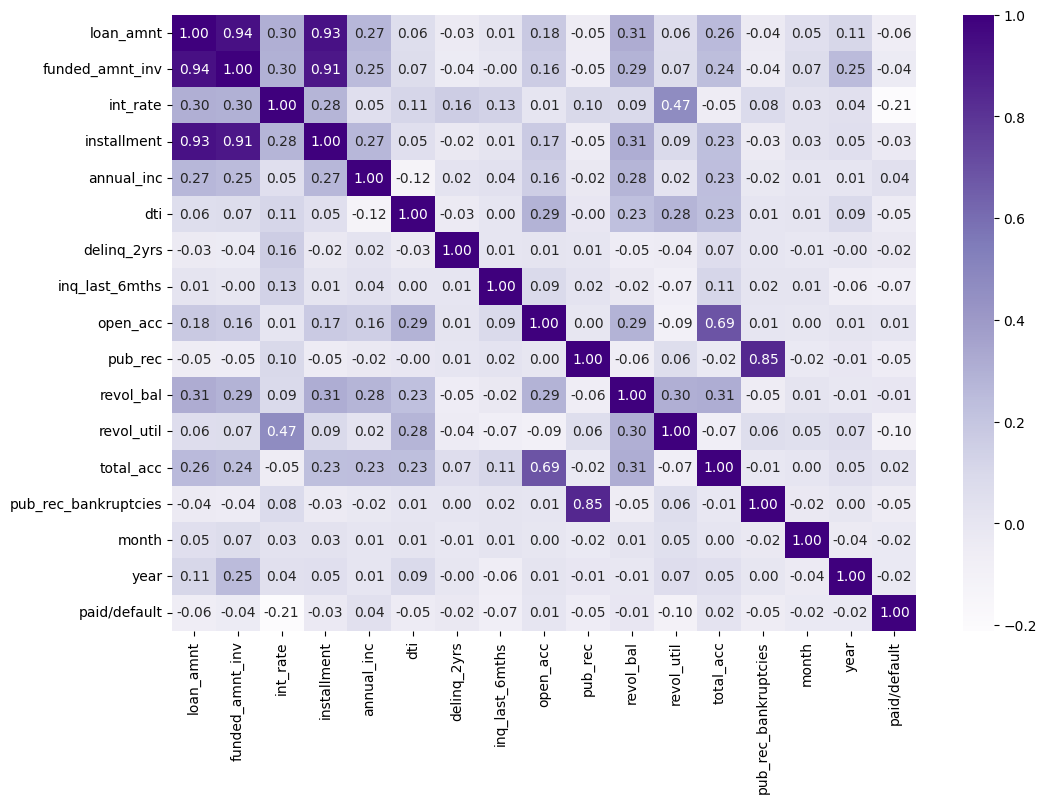

In [34]:
plt.figure(figsize=(12,8))
sns.heatmap(loan.corr(),annot=True,fmt='.2f', cmap="Purples")
plt.show()

In [35]:
#revol_util has 0.13% of missing values or 50 missing values so it safe to drop them
loan.dropna(subset=["revol_util"], inplace = True)
loan["revol_util"].isnull().sum()

0

In [36]:
#imputing missing values in "pub_rec_bankrupticies"
loan["pub_rec_bankruptcies"].fillna(loan["pub_rec_bankruptcies"].median(), inplace=True)
null_col_count(loan, percentage=True)

Columns: 


In [37]:
loan.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies', 'month', 'year', 'paid/default'],
      dtype='object')

## **UNIVARIATE ANALYSIS**

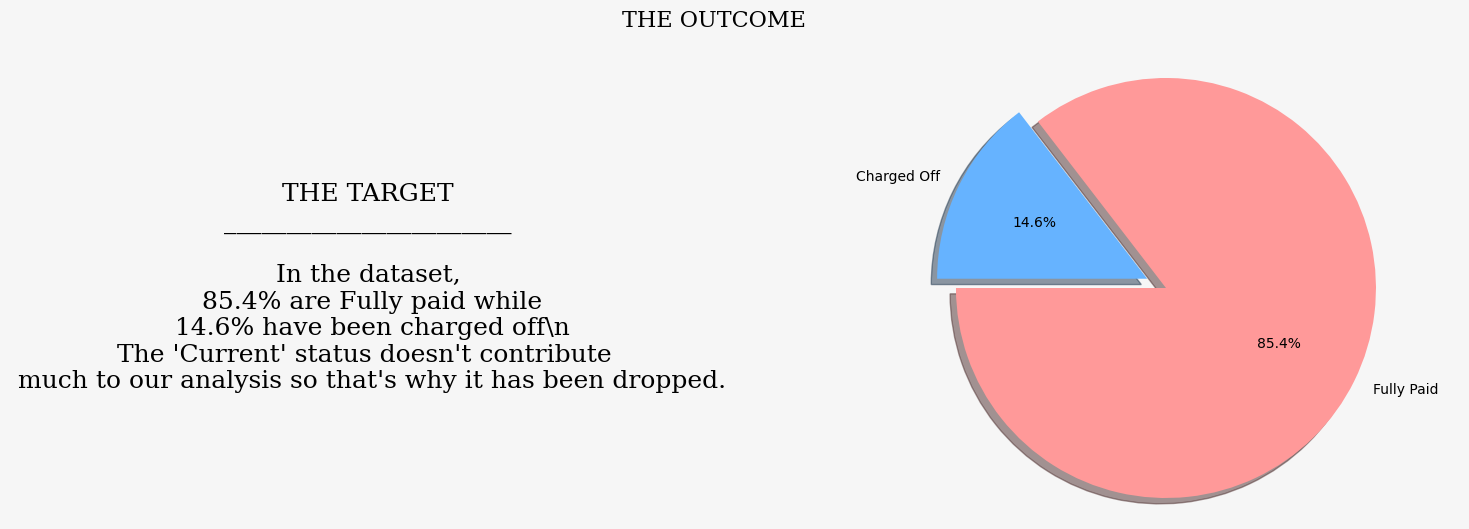

In [38]:
## the first univariate analysis that I wanted to now is of how many have paid loans and how many have charged off
fig = plt.figure(figsize=(18,6)) # Creating a figure
area = fig.add_gridspec(1,2) # Defining a grid for subplots
area.update(wspace=0.3,hspace=0.15) # Adjusting the space between subplots
area_1 = fig.add_subplot(area[0,0]) # First subplot
area_2 = fig.add_subplot(area[0,1]) # Second subplot

# Setting the color for the plot background
bg_color = '#f6f6f6'
for selection in [fig, area_1, area_2]:
    selection.set_facecolor(bg_color)

# Plotting a pie chart for 'loan_status'
loan_status_values = loan['loan_status'].value_counts(normalize=True)
colors = ['#ff9999','#66b3ff','#99ff99'] # Defining colors for the pie chart
explode = (0.1, 0)  # Exploding the first slice for emphasis
area_2.pie(loan_status_values, explode=explode, labels=loan_status_values.index, colors=colors, autopct='%1.1f%%', shadow=True, startangle=180)
area_2.axis('equal')  # Ensuring the pie chart is a circle
area_2.text(-2.5,1.2,'THE OUTCOME',fontsize=16, fontfamily='serif') # Adding a title

# Calculating the number of missing values
m_vals = loan['loan_status'].isnull().sum()

# Calculating the relative frequencies of the unique values in 'loan_status'
fully_paid, charged_off = loan['loan_status'].value_counts(normalize=True)*100
fully_paid = np.round(fully_paid, 1)
charged_off = np.round(charged_off, 1)

# Adding a text box with observations
area_1.text(0.5,0.5,f"THE TARGET\n_______________________\n\nIn the dataset,\n {fully_paid}% are Fully paid \
while\n {charged_off}% have been charged off\\n\nThe 'Current' status \
doesn't contribute \n much to our analysis so that's why it has been dropped.",
ha='center',va='center',size=18, family='serif')

# Removing axis and spines
area_1.xaxis.set_visible(False)
area_1.yaxis.set_visible(False)
for position in ['left', 'right', 'top', 'bottom']:
    for selection in [area_1, area_2]:
        if position == 'bottom' and selection == area_2:
            selection.spines[position].set_visible(True)
        else:
            selection.spines[position].set_visible(False)

## **ANNUAL INCOME**

#NEEDS YOUR ATTENTION

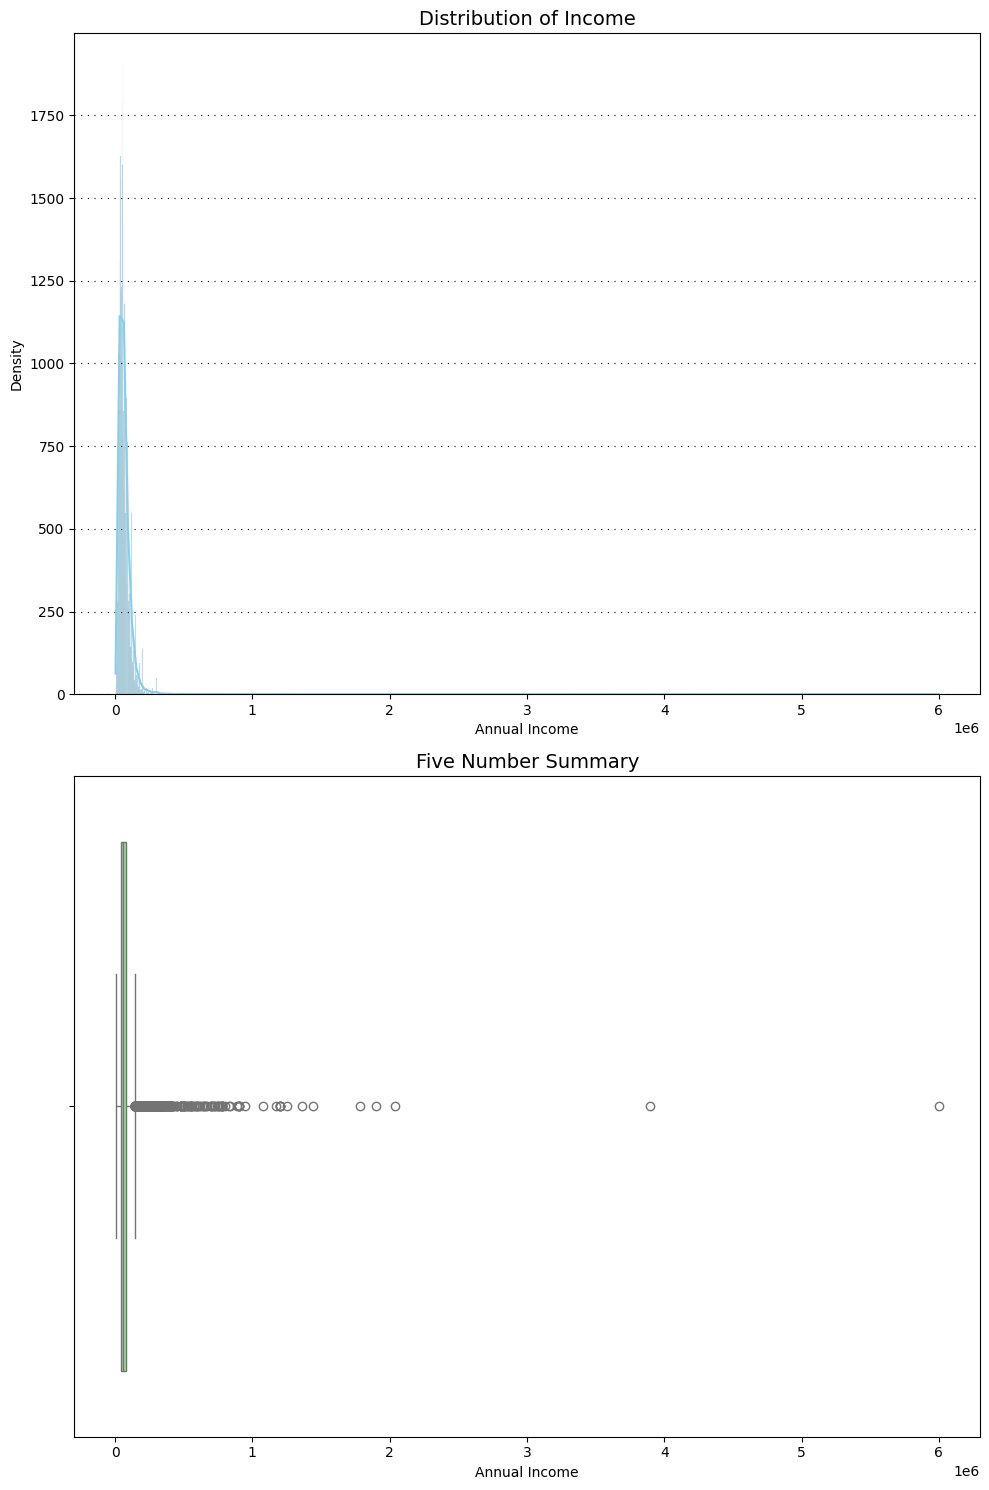

In [39]:
fig, axes = plt.subplots(nrows=2, figsize=(10,15))

# Distribution plot
dist_plot = sns.histplot(loan['annual_inc'], kde=True, color='skyblue', ax=axes[0])
dist_plot.set_title('Distribution of Income', fontsize=14, color='black')
dist_plot.set_ylabel('Density', fontsize=10, color='black')
dist_plot.set_xlabel('Annual Income', fontsize=10, color='black')
dist_plot.grid(color="#000000", linestyle=":", axis="y", zorder=0, dashes=(1,5))

# Outlier plot
box_plot = sns.boxplot(x=loan['annual_inc'], color='lightgreen', ax=axes[1])
box_plot.set_title('Five Number Summary', fontsize=14, color='black')
box_plot.set_xlabel('Annual Income', fontsize=10, color='black')

plt.tight_layout()
plt.show()


In [40]:
# Numerical summary
print('Numerical Summary of Annual Income: ')
mean = loan['annual_inc'].mean()
median = loan['annual_inc'].quantile(0.5)
ninety_percentile = loan['annual_inc'].quantile(0.9)
ninety_nine_percentile = loan['annual_inc'].quantile(0.99)
max_value = loan['annual_inc'].quantile(1)

print(f'Mean: {mean:.2f}')
print(f'Median: {median:.2f}')
print(f'90th Percentile: {ninety_percentile:.2f}')
print(f'99th Percentile: {ninety_nine_percentile:.2f}')
print(f'Maximum Value: {max_value:.2f}')

Numerical Summary of Annual Income: 
Mean: 68809.23
Median: 59000.00
90th Percentile: 115000.00
99th Percentile: 234000.00
Maximum Value: 6000000.00


## •  From the above observations it's clear that there are some outliers which will effect our overall analysis

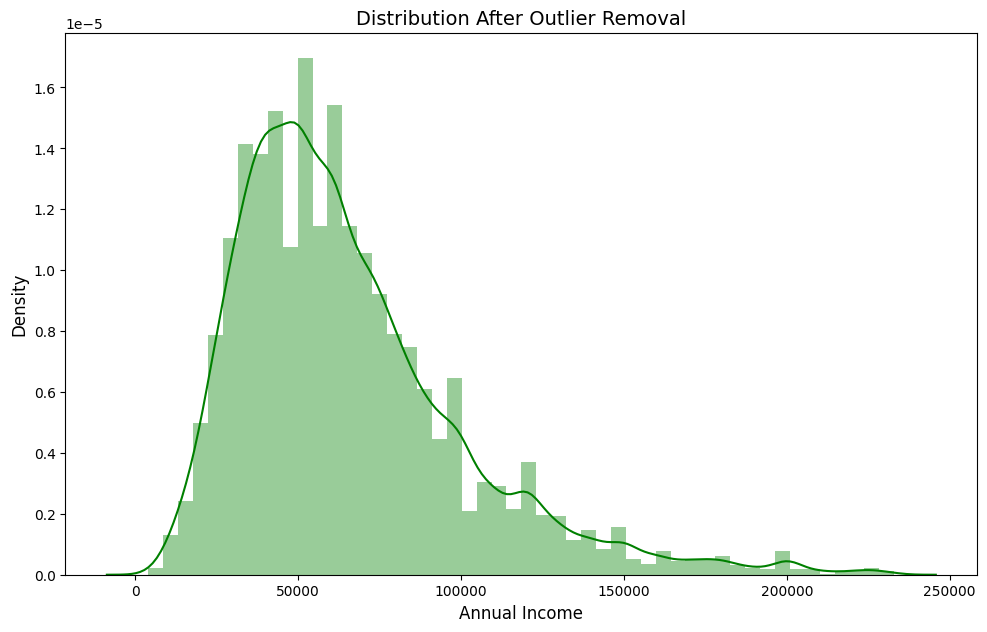

In [41]:
plt.figure(figsize=(10,12))
# Removing outliers
loan = loan[loan['annual_inc'] < loan['annual_inc'].quantile(0.99)]

# Second subplot (after outlier removal)
plt.subplot(2, 1, 2)
ax2 = sns.distplot(loan['annual_inc'], color='green')
ax2.set_title('Distribution After Outlier Removal', fontsize=14)
ax2.set_xlabel('Annual Income', fontsize=12)
ax2.set_ylabel('Density', fontsize=12)

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

## **INTEREST RATE**

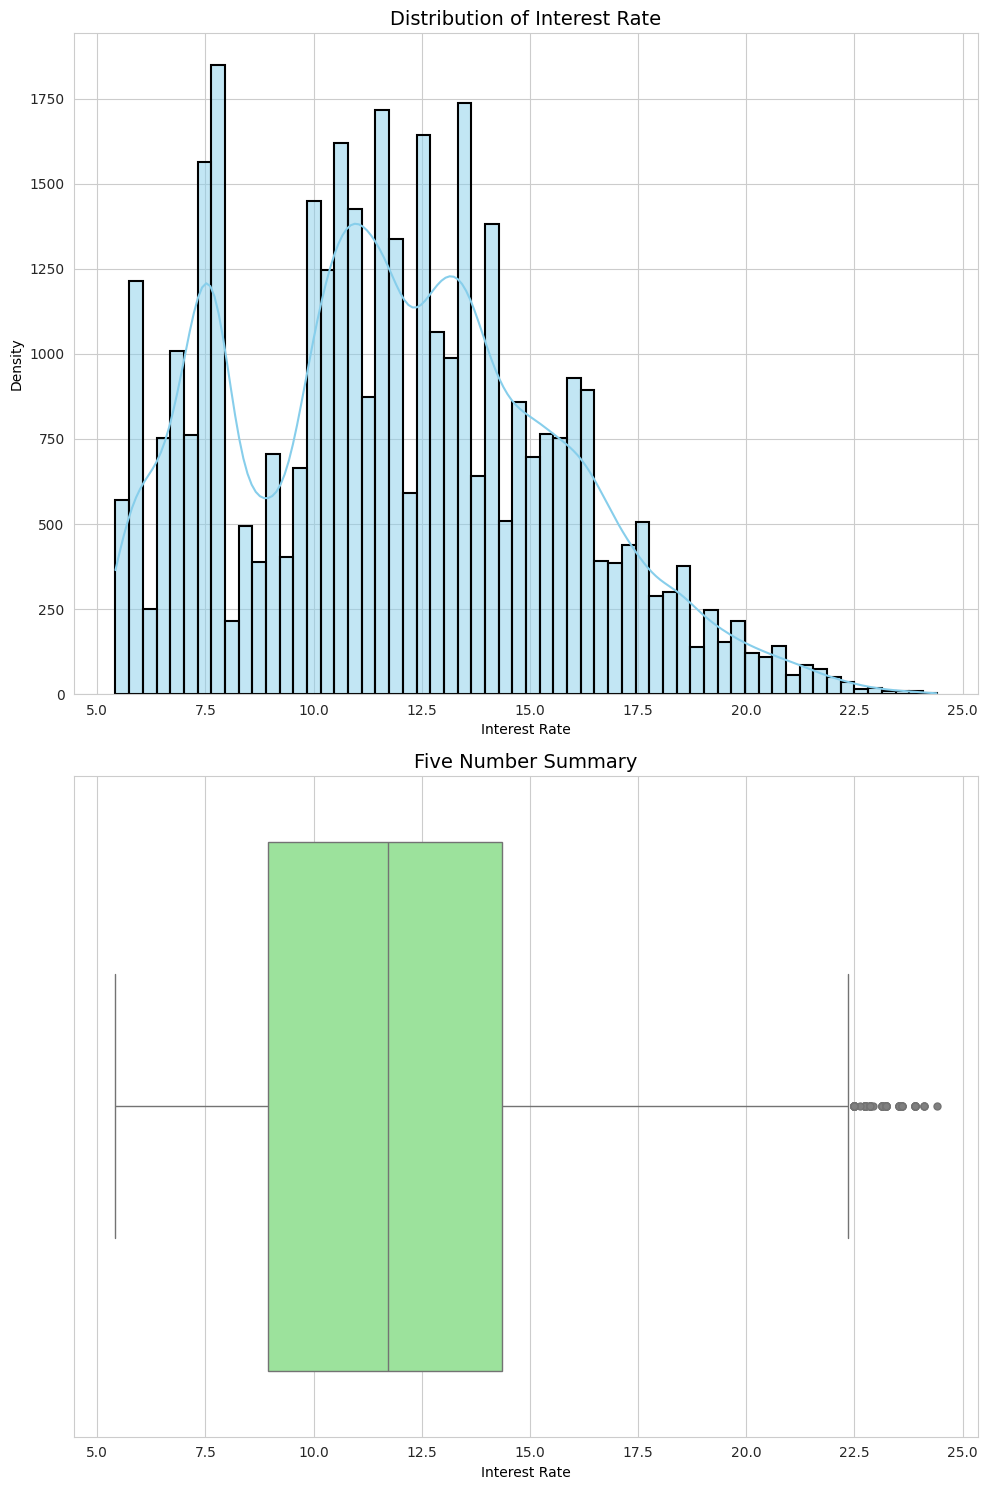

In [42]:
# Set the overall aesthetics
sns.set_style("whitegrid")

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=2, figsize=(10, 15))

# Distribution plot with shadow effect
dist_plot = sns.histplot(loan['int_rate'], kde=True, color='skyblue', ax=axes[0],
                         edgecolor='black', linewidth=1.5)  # Add black border to bars
dist_plot.set_title('Distribution of Interest Rate', fontsize=14, color='black')
dist_plot.set_ylabel('Density', fontsize=10, color='black')
dist_plot.set_xlabel('Interest Rate', fontsize=10, color='black')

# Outlier plot with shadow effect
box_plot = sns.boxplot(x=loan['int_rate'], color='lightgreen', ax=axes[1],
                       flierprops={'markerfacecolor': 'gray', 'markersize': 5})  # Add shadow to outliers
box_plot.set_title('Five Number Summary', fontsize=14, color='black')
box_plot.set_xlabel('Interest Rate', fontsize=10, color='black')

plt.tight_layout()
plt.show()

In [43]:
# Numerical summary
display(Markdown('**Numerical Summary:** '))
print('Average interest rate:',np.round(loan['int_rate'].mean()),'%')
print('Interest rate @75 percentile:',np.round(loan['int_rate'].quantile(0.75)),'%')
print('Interest rate @90 percentile:',np.round(loan['int_rate'].quantile(0.9)),'%')
print('Interest rate @99 percentile:',np.round(loan['int_rate'].quantile(0.99)),'%')

**Numerical Summary:** 

Average interest rate: 12.0 %
Interest rate @75 percentile: 14.0 %
Interest rate @90 percentile: 17.0 %
Interest rate @99 percentile: 21.0 %


## **LOAN AMOUNT**

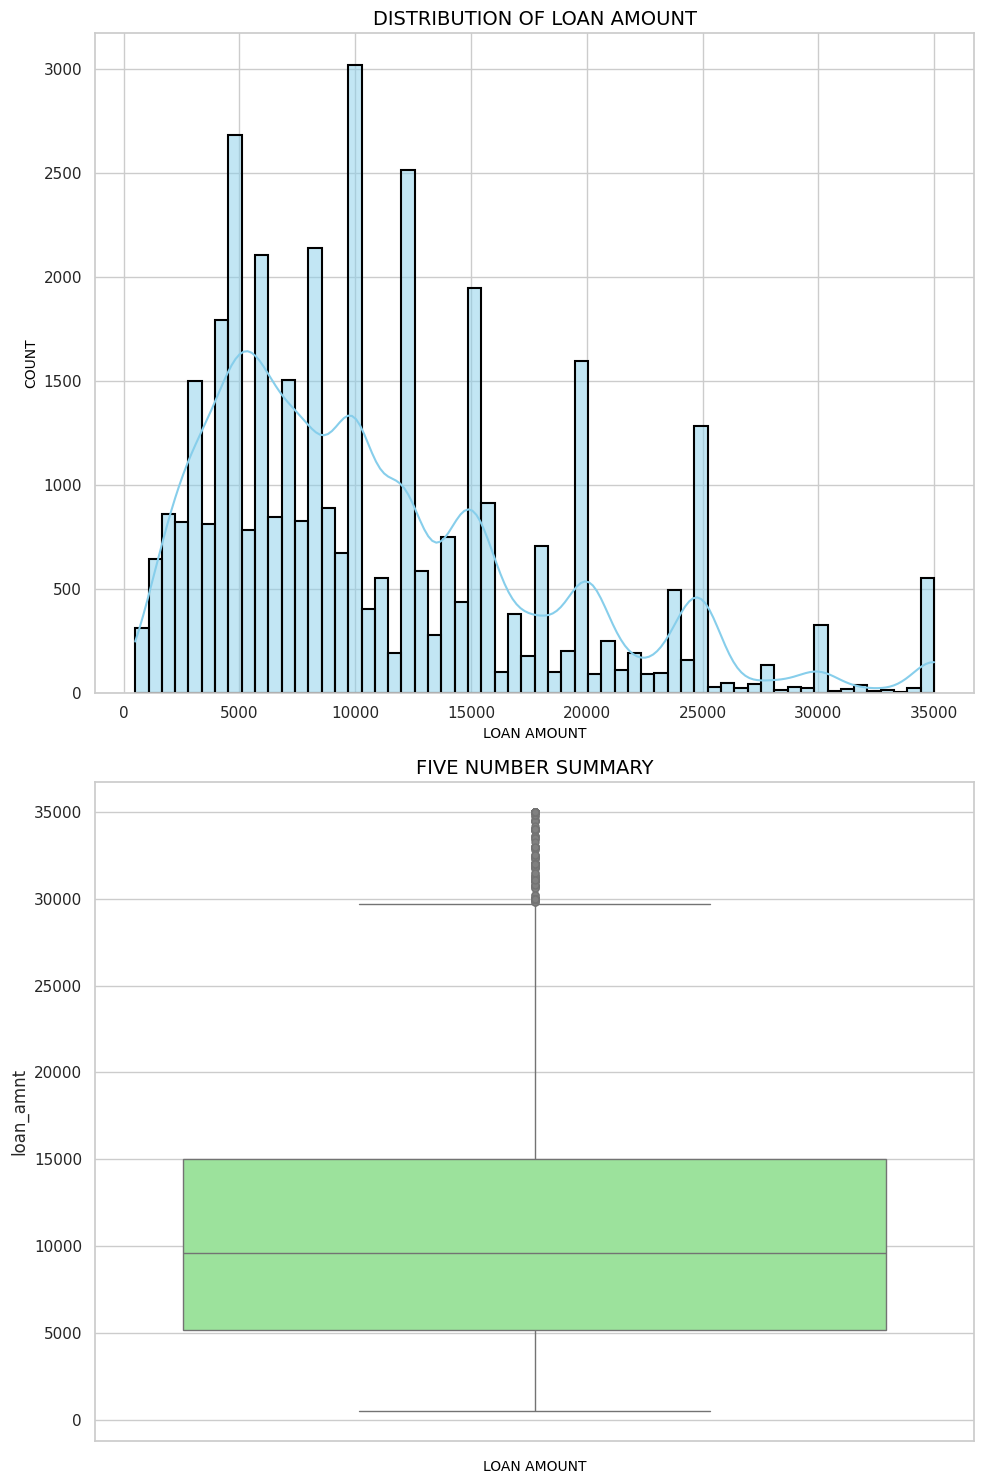

In [44]:
# Set the overall aesthetics
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=2, figsize=(10, 15))

# Distribution plot with shadow effect
dist_plot = sns.histplot(loan['loan_amnt'], kde=True, color='skyblue', ax=axes[0],
                         edgecolor='black', linewidth=1.5)  # Add black border to bars
dist_plot.set_title('DISTRIBUTION OF LOAN AMOUNT', fontsize=14, color='black')
dist_plot.set_ylabel('COUNT', fontsize=10, color='black')
dist_plot.set_xlabel('LOAN AMOUNT', fontsize=10, color='black')

# Outlier plot with shadow effect
box_plot = sns.boxplot(y=loan['loan_amnt'], color='lightgreen', ax=axes[1],
                       flierprops={'markerfacecolor': 'gray', 'markersize': 5})  # Add shadow to outliers
box_plot.set_title('FIVE NUMBER SUMMARY', fontsize=14, color='black')
box_plot.set_xlabel('LOAN AMOUNT', fontsize=10, color='black')

# Display the figure
plt.tight_layout()
plt.show()


## **LOAN/YEAR & TENTURE**

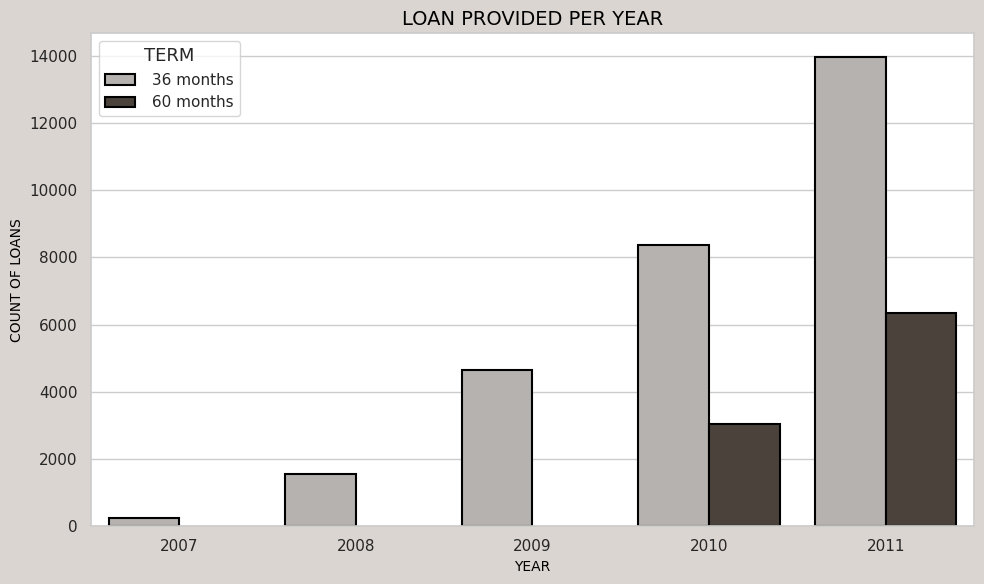

In [45]:
# Set the overall aesthetics
bg_color = '#DAD5D1'
#sns.set(style="whitegrid")

# Create a figure
fig = plt.figure(figsize=(10, 6))
fig.set_facecolor(bg_color)
# Creating countplot with shadow effect
viz = sns.countplot(x=loan['year'],
                    hue=loan['term'],
                    order=loan['year'].value_counts(ascending=True).index,
                    palette=['#B6B2AF', "#4C4239"],
                    edgecolor='black', linewidth=1.5)  # Add black border to bars

# Setting title and labels
viz.set_title('LOAN PROVIDED PER YEAR', fontsize=14, color='black')
viz.set_ylabel('COUNT OF LOANS', fontsize=10, color='black')
viz.set_xlabel('YEAR', fontsize=10, color='black')

# Setting legend
viz.legend(title='TERM', title_fontsize='13', loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

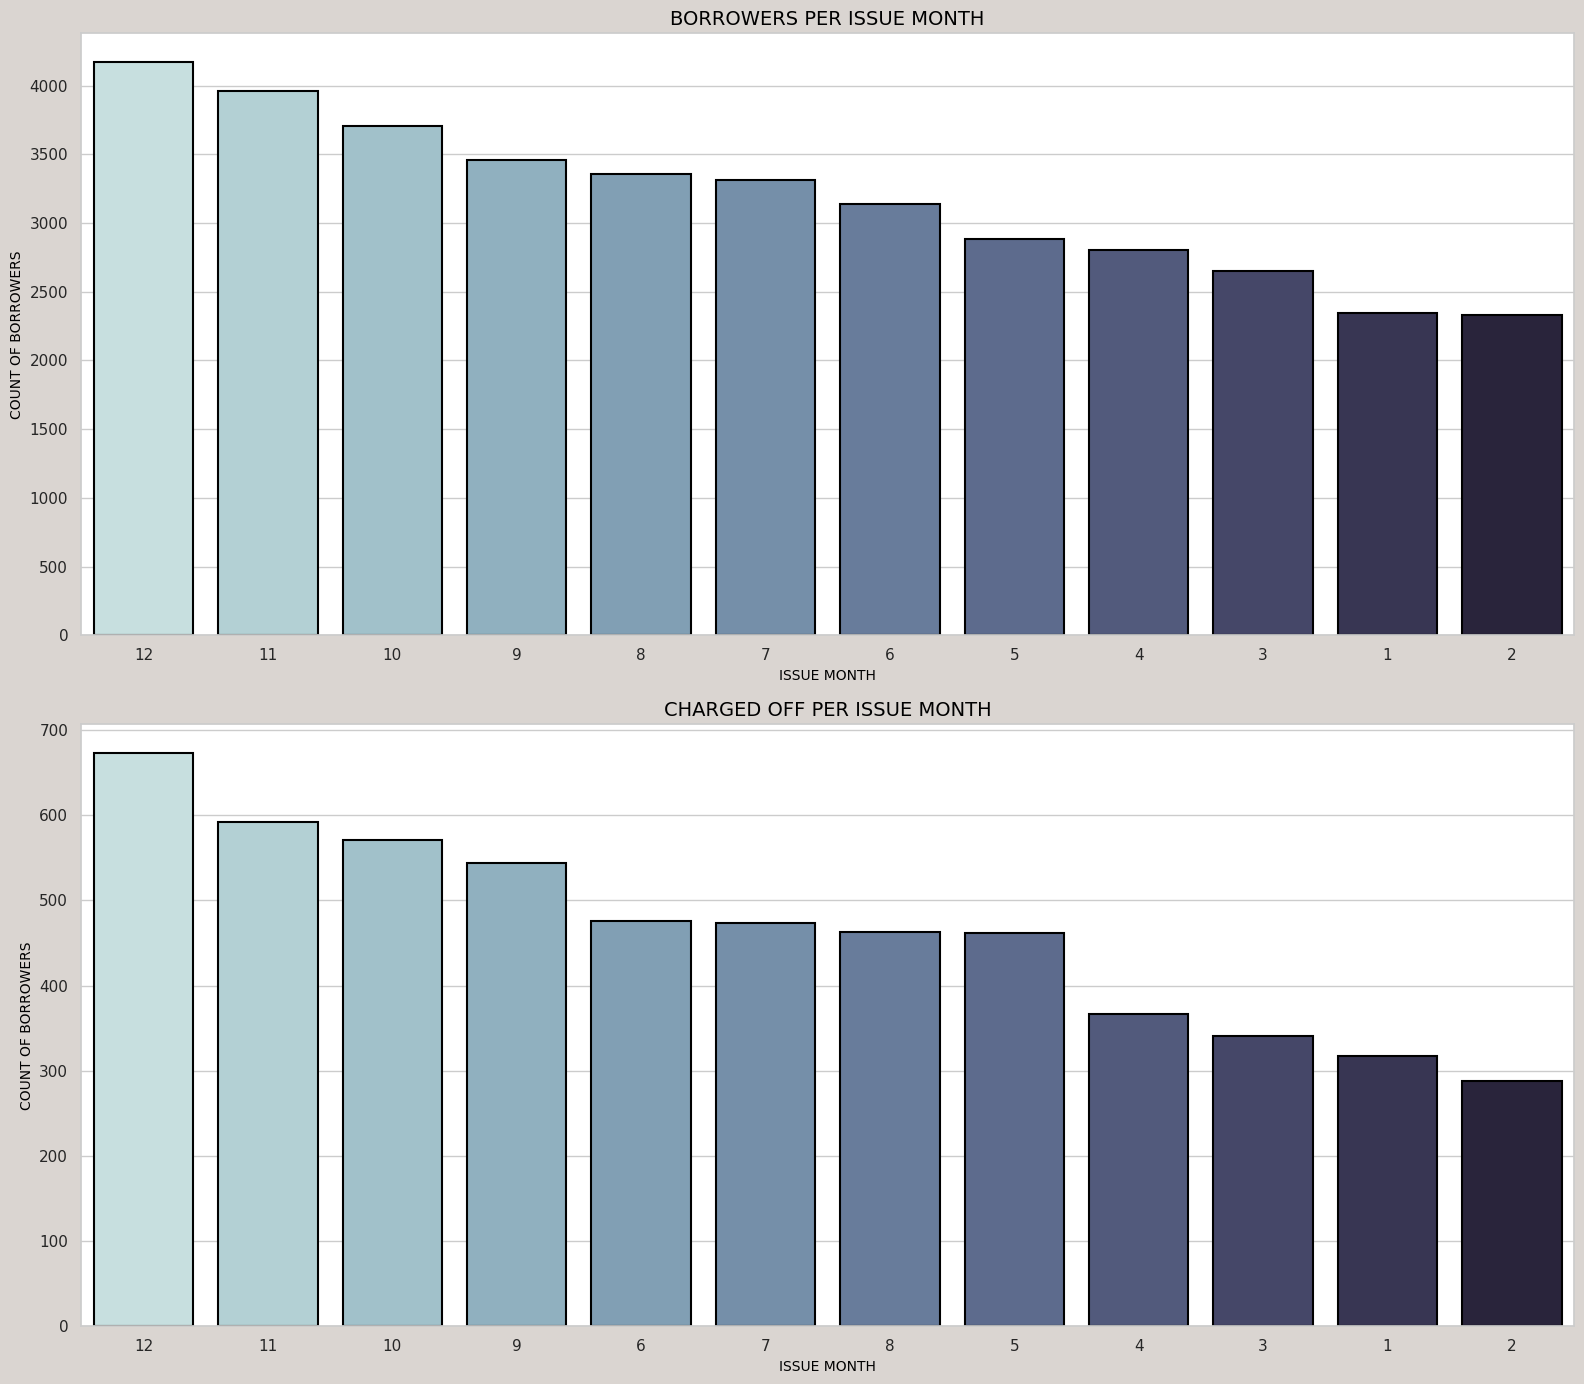

In [46]:
# Create a figure
fig, axes = plt.subplots(nrows=2, figsize=(16,14))
bg_color = '#DAD5D1'
fig.set_facecolor(bg_color)
# Count plot for issue month with shadow effect
sns.countplot(x='month', data=loan, palette="ch:start=.2,rot=-.3", ax=axes[0], \
              order=loan['month'].value_counts().index,\
              edgecolor='black', linewidth=1.5)  # Add black border to bars

axes[0].set_title('BORROWERS PER ISSUE MONTH', fontsize=14, color='black')
axes[0].set_ylabel('COUNT OF BORROWERS', fontsize=10, color='black')
axes[0].set_xlabel('ISSUE MONTH', fontsize=10, color='black')

# Count plot of charged off for issue month with shadow effect
charged_off_data = loan[loan['loan_status'] == 'Charged Off']
sns.countplot(x='month', data=charged_off_data, palette="ch:start=.2,rot=-.3", ax=axes[1],
              order=charged_off_data['month'].value_counts().index,
              edgecolor='black', linewidth=1.5)  # Add black border to bars

axes[1].set_title('CHARGED OFF PER ISSUE MONTH', fontsize=14, color='black')
axes[1].set_ylabel('COUNT OF BORROWERS', fontsize=10, color='black')
axes[1].set_xlabel('ISSUE MONTH', fontsize=10, color='black')

# Display the plot
plt.tight_layout()
plt.show()

## **PURPOSE OF LOAN**

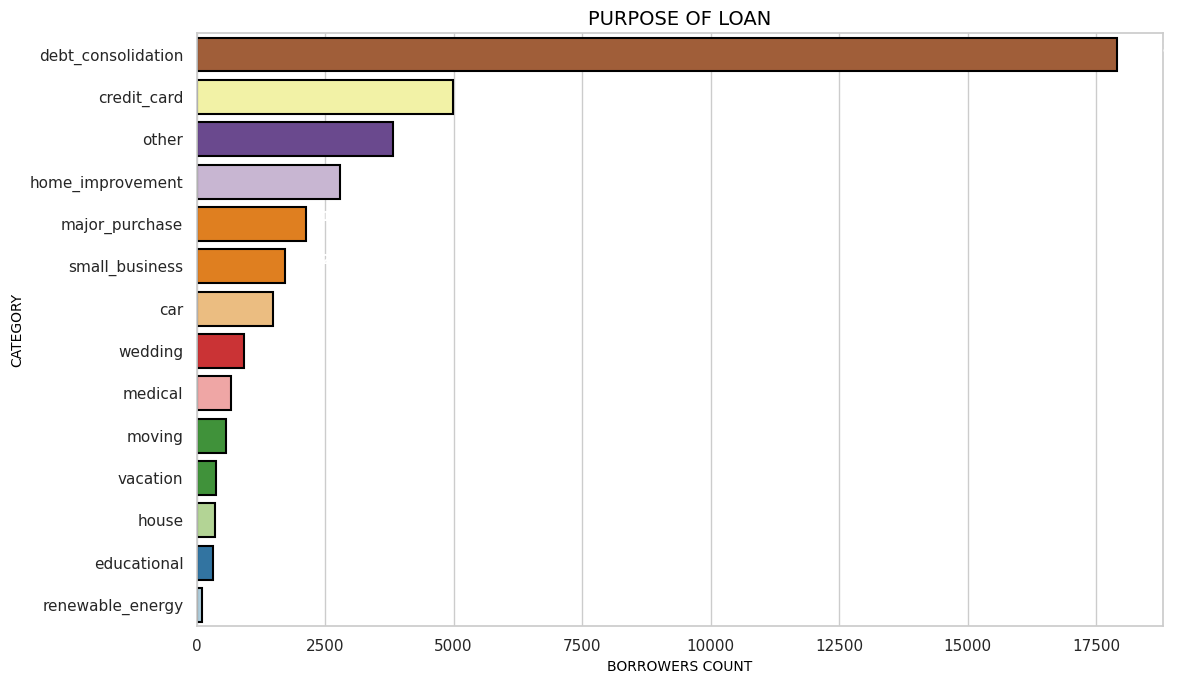

In [47]:
plt.figure(figsize=(12, 7))

# Countplot for purpose with shadow effect
viz = sns.countplot(y=loan['purpose'],
                    order=loan['purpose'].value_counts().index,
                    palette='Paired_r',
                    edgecolor='black',  # Add black border to bars
                    linewidth=1.5)      # Set border width

# Add shadow effect
for p in viz.patches:
    viz.annotate(f'{p.get_width():.0f}', (p.get_x() + p.get_width(), p.get_y() + 0.5),
                 xytext=(5, 5), textcoords='offset points',
                 fontsize=10, color='white', fontweight='bold')

viz.set_title('PURPOSE OF LOAN', fontsize=14, color='black')
viz.set_ylabel('CATEGORY', fontsize=10, color='black')
viz.set_xlabel('BORROWERS COUNT', fontsize=10, color='black')

# Display the plot
plt.tight_layout()
plt.show()

## **HOME OWNERS**

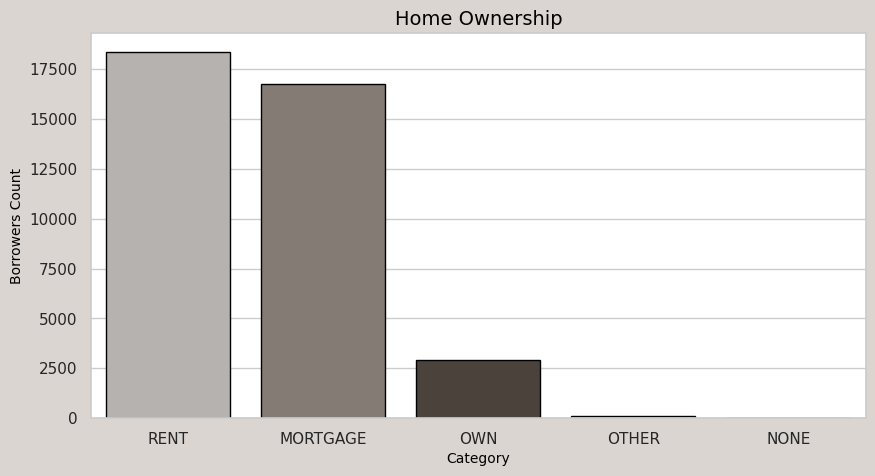

In [48]:
fig = plt.figure(figsize=(10, 5))
bg_color = '#DAD5D1'
fig.set_facecolor(bg_color)
viz = sns.countplot(x='home_ownership',
                    data=loan,
                    order=loan['home_ownership'].value_counts().index,
                    palette=['#B6B2AF',"#877B71", "#4C4239"],
                    edgecolor='black',  # Add black border for shadow effect
                    linewidth=1)      # Control border thickness

# Set plot title and axis labels
viz.set_title('Home Ownership', fontsize=14, color='black')
viz.set_xlabel('Category', fontsize=10, color='black')
viz.set_ylabel('Borrowers Count', fontsize=10, color='black')

# Rotate x-axis labels for better readability
viz.set_xticklabels(viz.get_xticklabels() )

plt.show()

**OBSERVATION ON UNIVARIATE ANALYSIS**
1. **Annual Income Outliers**:
  - The feature "annual_inc" exhibits outliers in the upper range.
2. **Discontinuity in "annual_inc"**:
  - Notably, there is a significant jump between the 99th and 100th percentiles of "annual_inc."
3. **Interest Rate Distribution**:
  - On average, the interest rate is approximately 12%.
  - However, there is a substantial increase in interest rates    
   beyond the 75th percentile.
4. **Preferred Loan Amounts**:
  - Most borrowers seek loan amounts between 5,000 and
    15,000.
  - This range appears to be popular among applicants.
5. **Interest Rate Range**:
  - The majority of borrowers receive interest rates between 9%   
    and 14%.
  - This suggests a common preference for moderate interest rates.
6. **Loan Tenure Preference**:
  - Over the years, the number of borrowers has consistently      increased.
  - Borrowers predominantly opt for a 36-month loan tenure.
7. **Seasonal Loan Approvals**:
  - Loans approved in Q4 (fourth quarter) are more likely to  default.
  - Seasonal patterns may impact loan performance.
8. **Loan Purpose**:
  - Debt consolidation and credit card bill payments account for  the majority of borrowings.
  - These purposes dominate the loan landscape.
9. **Home Ownership**:
  - A very small proportion of borrowers own their own homes.
  Homeownership is relatively uncommon among applicants.


## **UNDERSTANDING THE FINANCIAL FEATURES**

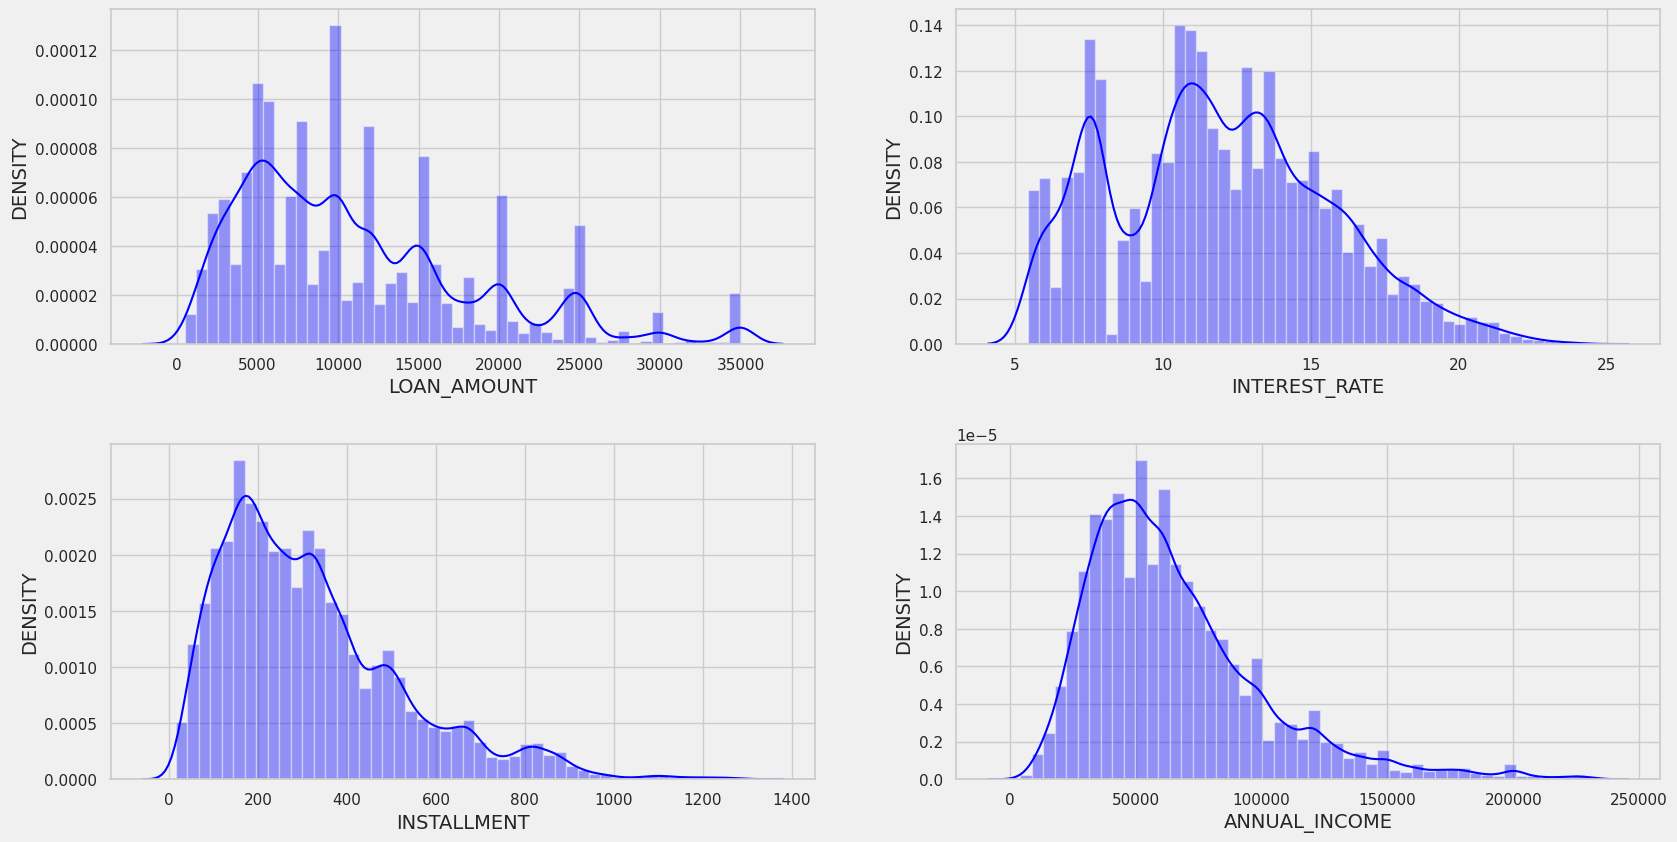

In [49]:
fig = plt.figure(figsize=(20, 10))
spec = fig.add_gridspec(2, 2)
spec.update(wspace=0.2, hspace=0.3)
sec_01 = fig.add_subplot(spec[0, 0])
sec_02 = fig.add_subplot(spec[0, 1])
sec_03 = fig.add_subplot(spec[1, 0])
sec_04 = fig.add_subplot(spec[1, 1])

# Adding color preference
bg_color = '#f0f0f0'  # Changed to a light grey color
for selection in [fig, sec_01, sec_02, sec_03, sec_04]:
    selection.set_facecolor(bg_color)

# Plotting the graph
sec = [sec_01, sec_02, sec_03, sec_04]

cnt = 0
for feature in ["loan_amnt", "int_rate", "installment", "annual_inc"]:
    sns.distplot(loan[feature], ax=sec[cnt], color='blue')  # Changed to a blue color
    sec[cnt].set_ylabel('DENSITY', fontsize=14)  # Increased font size
    cnt += 1

# Naming the axis
sec_01.set_xlabel('LOAN_AMOUNT', fontsize=14)  # Increased font size
sec_02.set_xlabel('INTEREST_RATE', fontsize=14)  # Increased font size
sec_03.set_xlabel('INSTALLMENT', fontsize=14)  # Increased font size
sec_04.set_xlabel('ANNUAL_INCOME', fontsize=14)  # Increased font size

plt.show()

- Based on the nature of distribution **"loan_amnt", "int_rate", "annual_inc", "installment"** can be bucketed for further analysis.

## **BIVARIATE ANALYSIS**

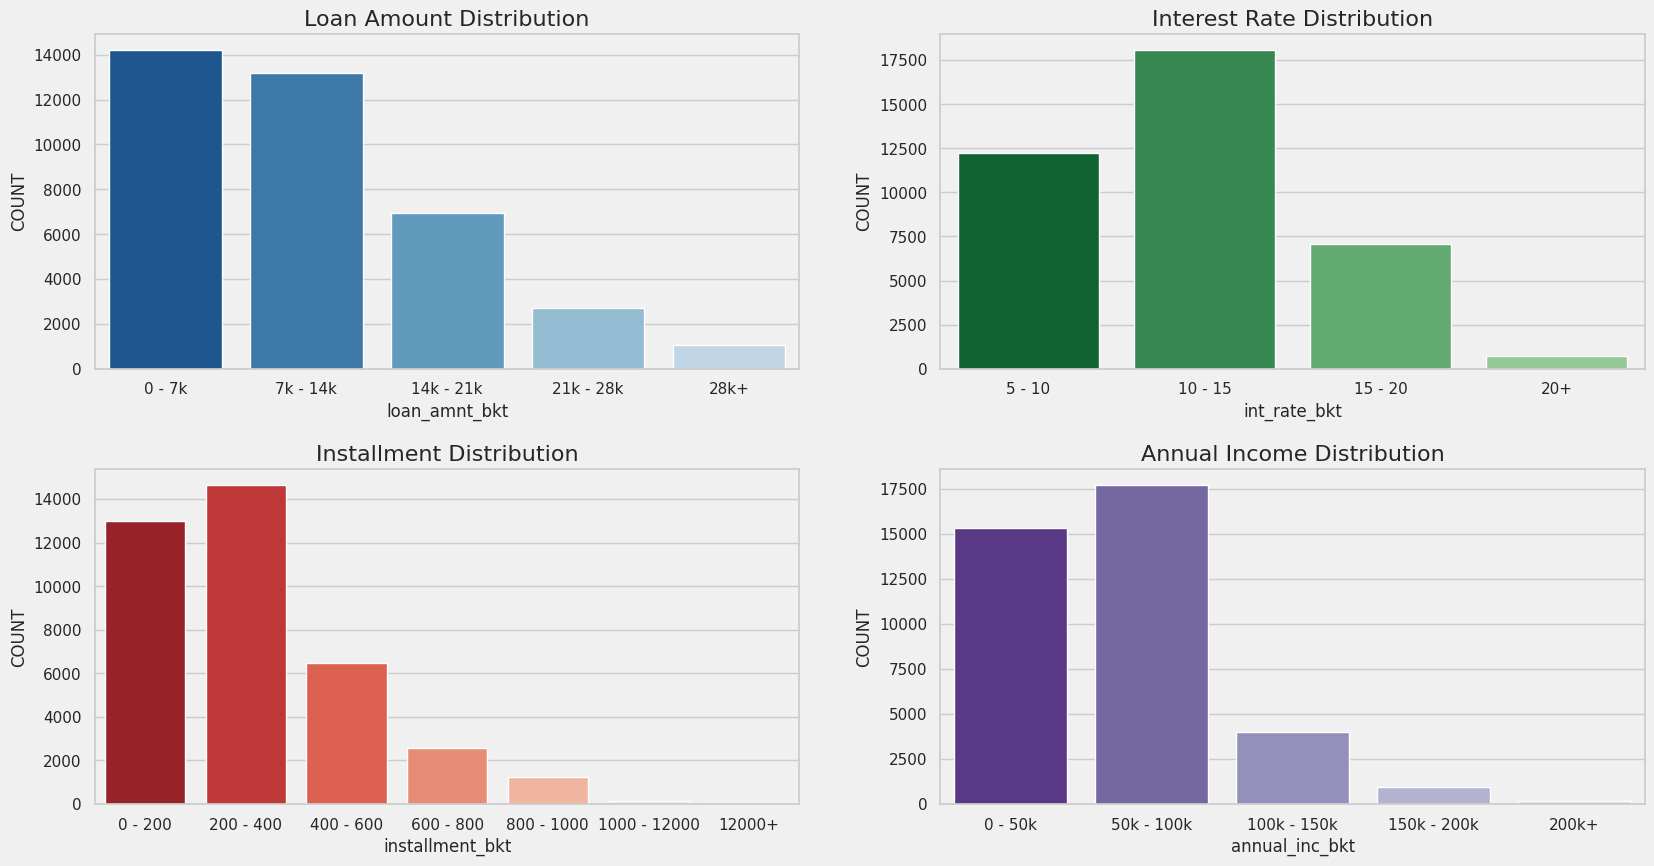

In [50]:
def create_bucket(data, feature, bins, labels, new_feature_name):
    data[new_feature_name] = pd.cut(data[feature], bins, labels=labels)

# Creating categorical buckets
create_bucket(loan, 'loan_amnt', list(range(0,40001,7000)), ['0 - 7k', '7k - 14k', '14k - 21k', '21k - 28k', '28k+'], "loan_amnt_bkt")
create_bucket(loan, 'int_rate', list(range(5,26,5)), ['5 - 10', '10 - 15', '15 - 20', '20+'], "int_rate_bkt")
create_bucket(loan, 'annual_inc', list(range(0,250001,50000)), ['0 - 50k', '50k - 100k', '100k - 150k', '150k - 200k', '200k+'], 'annual_inc_bkt')
create_bucket(loan, 'installment', list(range(0,1401,200)), ['0 - 200', '200 - 400', '400 - 600', '600 - 800', '800 - 1000', '1000 - 12000', '12000+'], "installment_bkt")

# Creating plots
fig = plt.figure(figsize=(20,10))
spec = fig.add_gridspec(2,2)
spec.update(wspace=0.2, hspace=0.3)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[1,0])
sec_04 = fig.add_subplot(spec[1,1])

# Adding color preference
bg_color = '#f0f0f0'
for selection in [fig, sec_01, sec_02, sec_03, sec_04]:
    selection.set_facecolor(bg_color)

# Plotting the graph
sec = [sec_01, sec_02, sec_03, sec_04]
features = ['loan_amnt_bkt', 'int_rate_bkt', 'installment_bkt', 'annual_inc_bkt']
titles = ['Loan Amount Distribution', 'Interest Rate Distribution', 'Installment Distribution', 'Annual Income Distribution']
colors = ['Blues_r', 'Greens_r', 'Reds_r', 'Purples_r']

for i in range(4):
    sns.countplot(x=loan[features[i]], ax=sec[i], palette=sns.color_palette(colors[i]))
    sec[i].set_ylabel('COUNT' , fontsize=12)
    sec[i].set_title(titles[i], fontsize=16)

plt.show()

Bivariate Analysis

In our next step of analysis, we will focus solely on the data of borrowers who have been **Charged Off**.

To facilitate this, we will create a new dataframe that consists only of data pertaining to **Charged Off** borrowers.

In [51]:
# Creating dataframe with feature value "Charged Off":
co_data = loan[loan['loan_status'] == 'Charged Off']

# Looking into the nature of data:
display(Markdown(f'The trimmed data has **{co_data.shape[0]}** rows and **{co_data.shape[1]}** columns'))
display(Markdown(f'The unique value is **{co_data["loan_status"].unique()}**'))

The trimmed data has **5568** rows and **31** columns

The unique value is **['Charged Off']**

## **EMPLOYEE LENGTH VS LOAN STATUS**

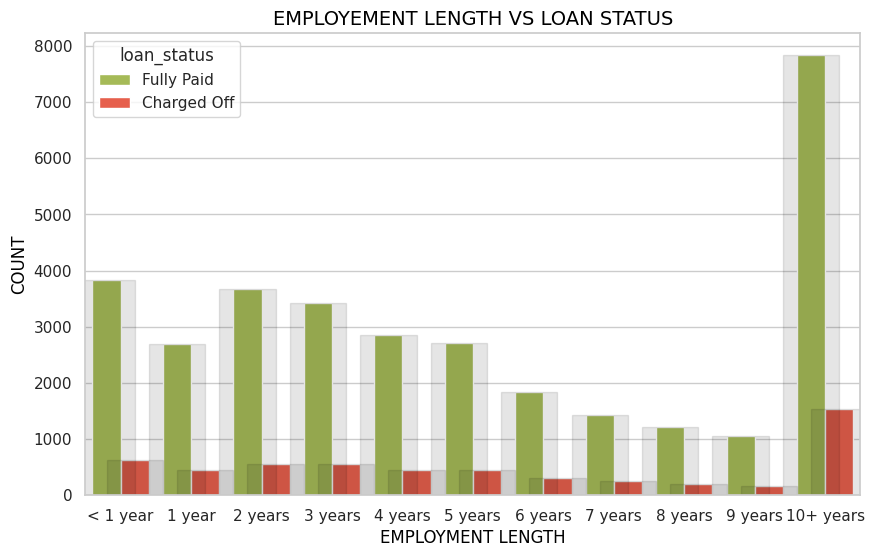

In [52]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='emp_length', hue='loan_status', data=loan,
                   order=['< 1 year',  '1 year','2 years','3 years', '4 years',
                          '5 years', '6 years', '7 years',  '8 years', '9 years', '10+ years'],
                   palette=['#AECB46', "#FF4C33"])

# Adding shadow effect to each bar
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    ax.add_patch(patches.Rectangle((x_value-0.4,0),0.8,y_value,fill=True, color='black', alpha=0.1))

# Naming the axis and title
ax.set_title('EMPLOYEMENT LENGTH VS LOAN STATUS',fontsize=14,color='black')
ax.set_ylabel('COUNT',fontsize =12,color = 'black')  # Increased font size
ax.set_xlabel('EMPLOYMENT LENGTH',fontsize =12,color = 'black')  # Increased font size

plt.show()

## **HOME OWNERSHIP VS LOAN AMOUNT**

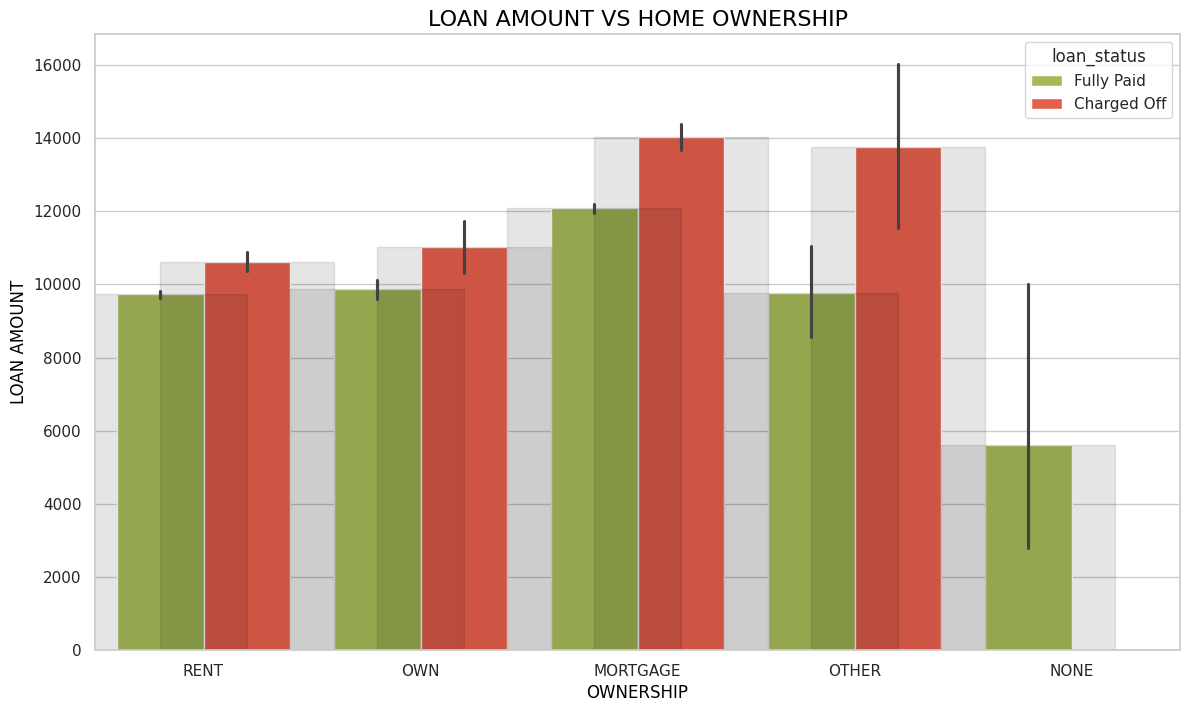

In [53]:
plt.figure(figsize=(14,8))
ax = sns.barplot(data =loan,
                 x='home_ownership',
                 y='loan_amnt',
                 hue ='loan_status',
                 palette=['#AECB46', "#FF4C33"])

# Adding shadow effect to each bar
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    ax.add_patch(patches.Rectangle((x_value-0.4,0),0.8,y_value,fill=True, color='black', alpha=0.1))

# Naming the axis and title
ax.set_title('LOAN AMOUNT VS HOME OWNERSHIP',fontsize=16,color='black')  # Increased font size
ax.set_xlabel('OWNERSHIP',fontsize =12,color = 'black')  # Increased font size
ax.set_ylabel('LOAN AMOUNT',fontsize =12,color = 'black')  # Increased font size

plt.show()

## **LOAN AMOUNT VS PURPOSE**

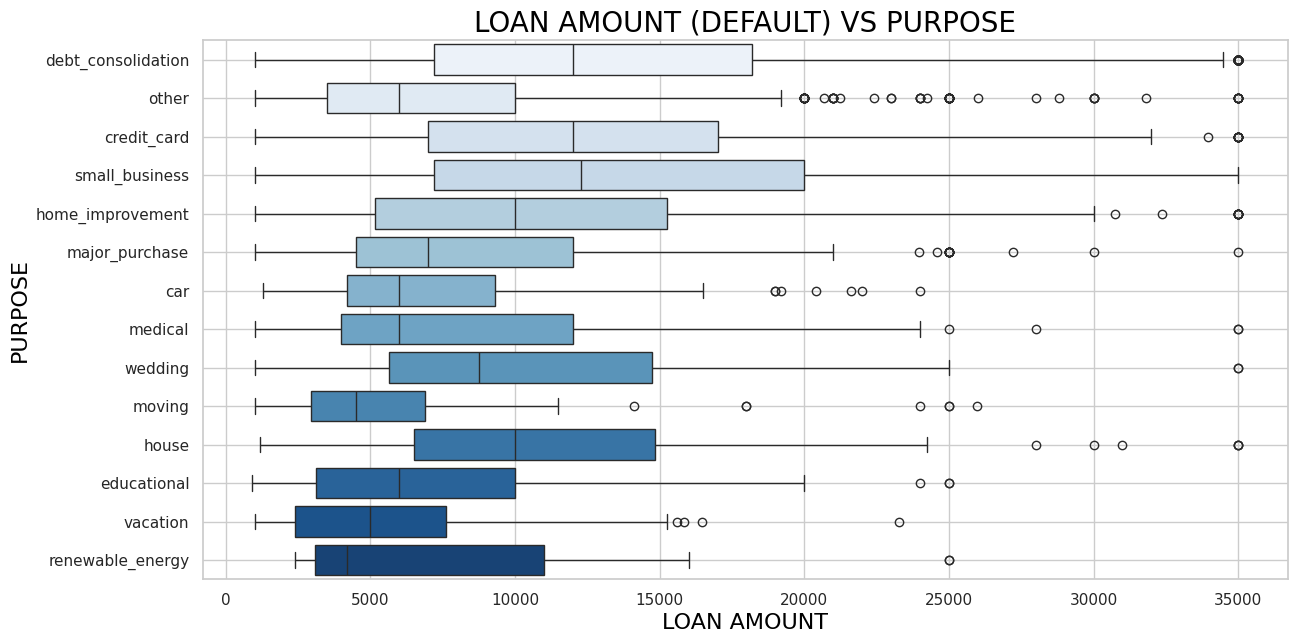

In [54]:
plt.figure(figsize=(14,7))
viz = sns.boxplot(x='loan_amnt',
            y='purpose',
            order=co_data['purpose'].value_counts().index,
            data=co_data,
            palette="Blues")

# Adding a grid for better readability
viz.grid(True)

# Adding shadow effect to each box
for i,artist in enumerate(viz.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*6,i*6+6):
        line = viz.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

# Naming the axis and title
viz.set_xlabel('LOAN AMOUNT', fontsize = 16, color = 'black')  # Increased font size
viz.set_ylabel('PURPOSE', fontsize = 16, color = 'black')  # Increased font size
viz.set_title('LOAN AMOUNT (DEFAULT) VS PURPOSE', fontsize=20, color='black')  # Increased font size

plt.show()

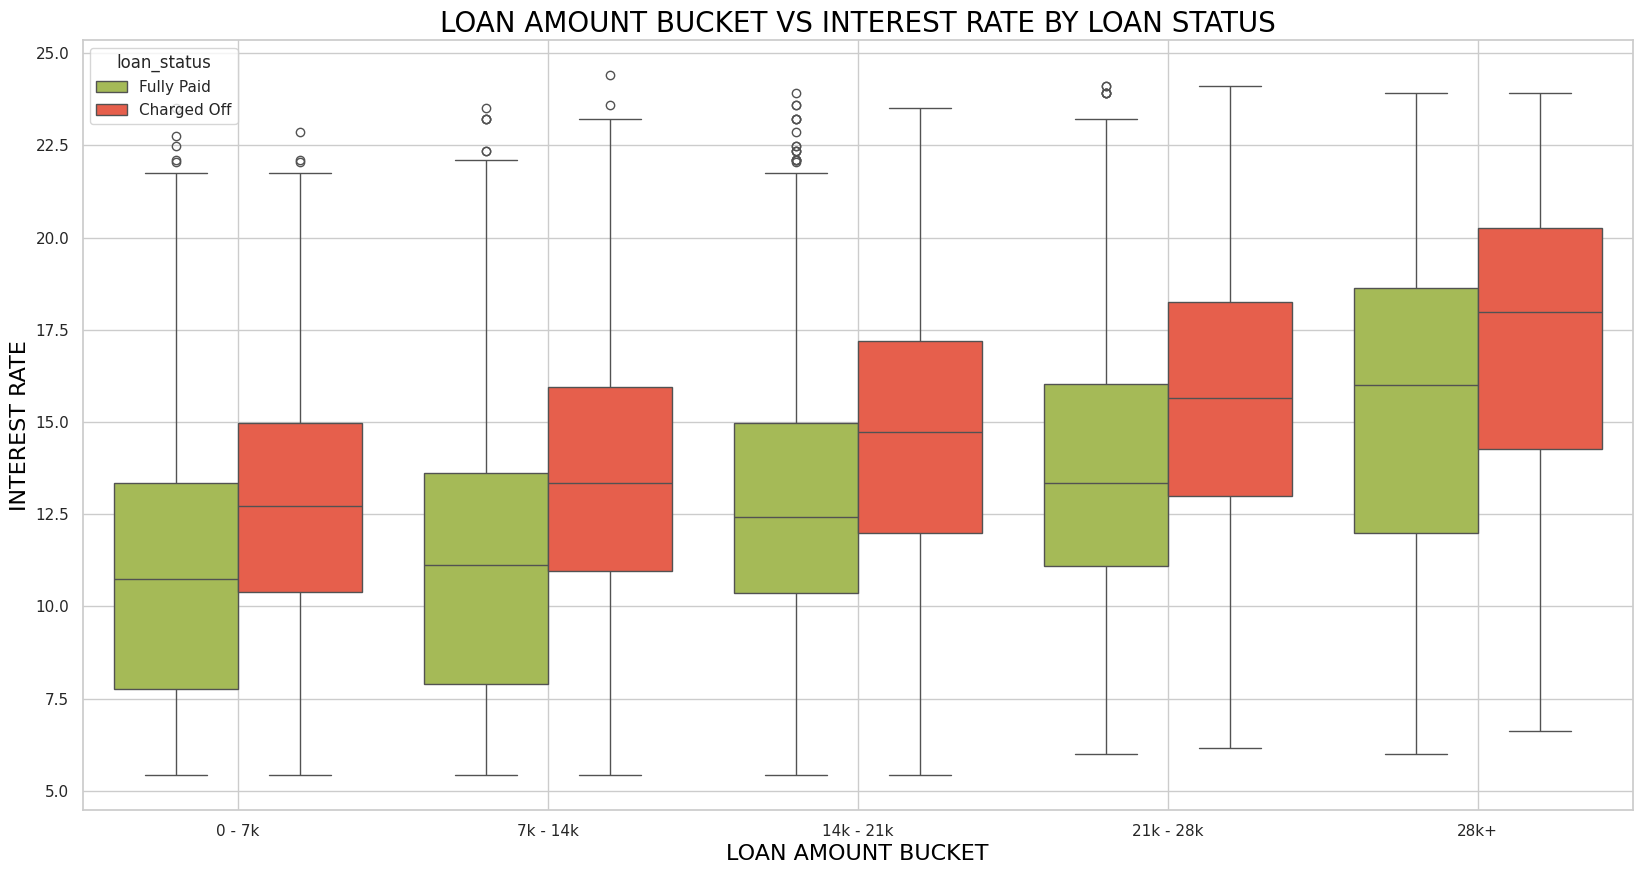

In [55]:
# Box plot for loan amount bucket vs interest rate by loan status as hue
plt.figure(figsize=(20,10))
viz = sns.boxplot(x='loan_amnt_bkt',
            y='int_rate',
            hue ='loan_status',
            order=loan['loan_amnt_bkt'].value_counts().index,
            palette=['#AECB46', "#FF4C33"],
            data=loan)

# Adding a grid for better readability
viz.grid(True)

# Adding shadow effect to each box
for i,artist in enumerate(viz.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*6,i*6+6):
        line = viz.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

# Naming the axis and title
viz.set_xlabel('LOAN AMOUNT BUCKET', fontsize = 16, color = 'black')  # Increased font size
viz.set_ylabel('INTEREST RATE', fontsize = 16, color = 'black')  # Increased font size
viz.set_title('LOAN AMOUNT BUCKET VS INTEREST RATE BY LOAN STATUS', fontsize=20, color='black')  # Increased font size

plt.show()

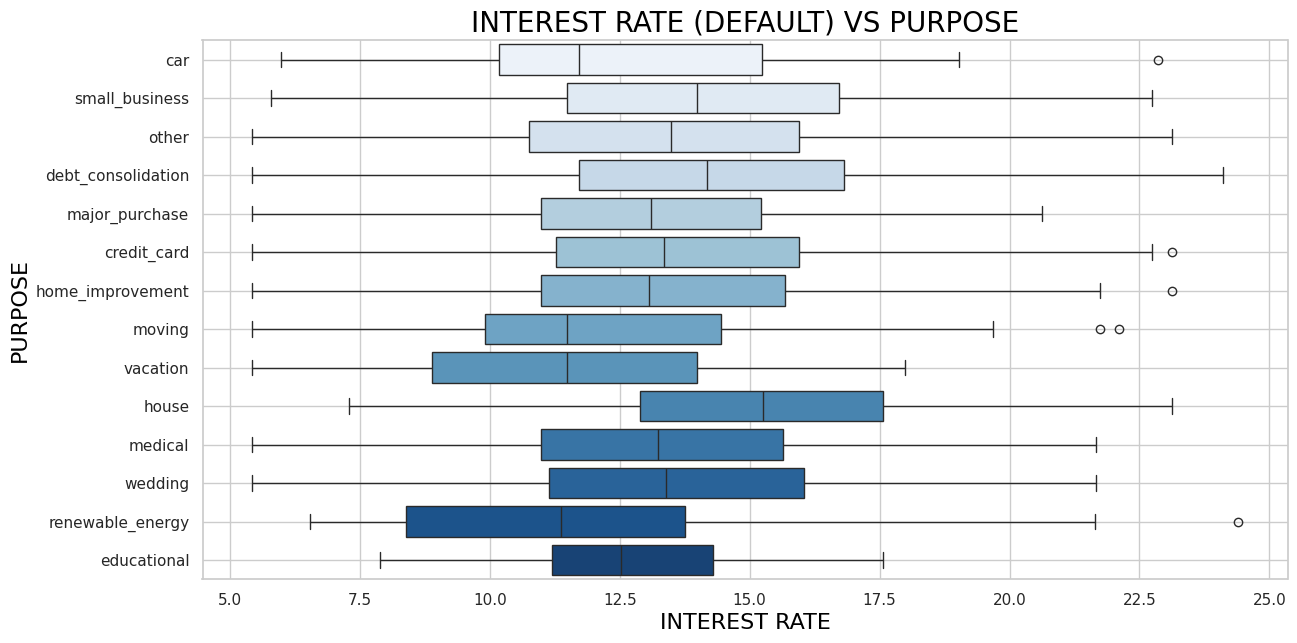

In [56]:
# Box plot for interest rate vs purpose
plt.figure(figsize=(14,7))
viz = sns.boxplot(x='int_rate',
            y='purpose',
            data=co_data,
            palette="Blues")

# Adding a grid for better readability
viz.grid(True)

# Adding shadow effect to each box
for i,artist in enumerate(viz.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*6,i*6+6):
        line = viz.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

# Naming the axis and title
viz.set_xlabel('INTEREST RATE', fontsize = 16, color = 'black')  # Increased font size
viz.set_ylabel('PURPOSE', fontsize = 16, color = 'black')  # Increased font size
viz.set_title('INTEREST RATE (DEFAULT) VS PURPOSE', fontsize=20, color='black')  # Increased font size

plt.show()

## **INTEREST RATE VS TERM**

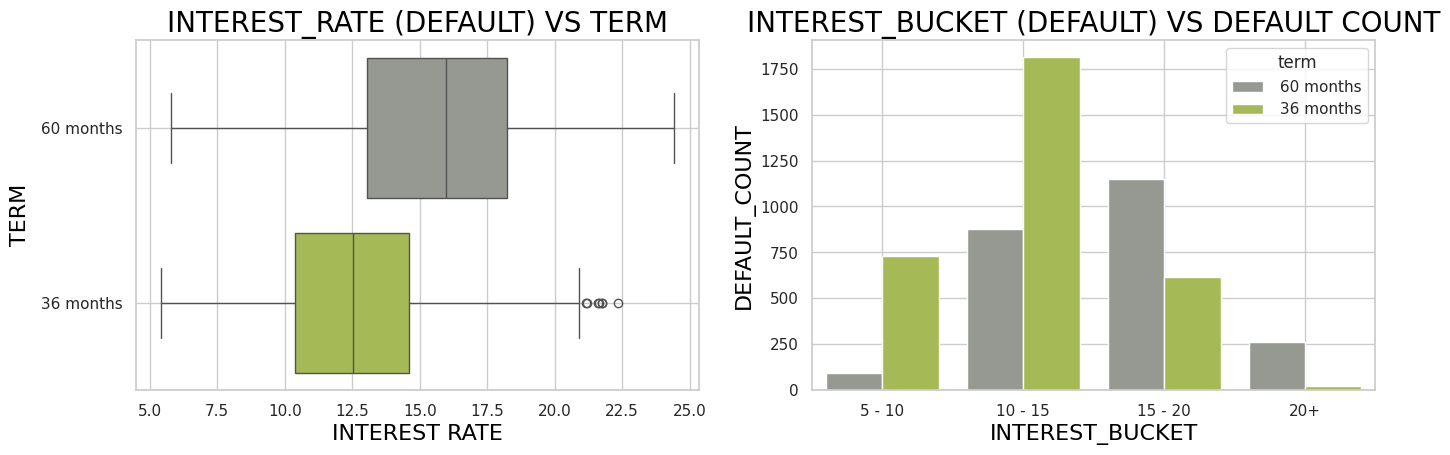

In [57]:
# Box plot for interest rate vs term
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
viz = sns.boxplot(x='int_rate',
            y='term',
            palette=['#979A90',"#AECB46"],
            data=co_data)

# Adding a grid for better readability
viz.grid(True)

# Adding shadow effect to each box
for i,artist in enumerate(viz.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*6,i*6+6):
        line = viz.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

# Naming the axis and title
viz.set_xlabel('INTEREST RATE', fontsize = 16, color = 'black')  # Increased font size
viz.set_ylabel('TERM', fontsize = 16, color = 'black')  # Increased font size
viz.set_title('INTEREST_RATE (DEFAULT) VS TERM', fontsize=20, color='black')  # Increased font size

# Count plot for interest rate vs default count by term as hue
plt.subplot(2,2,2)
viz = sns.countplot(x='int_rate_bkt',
              hue='term',
              palette=['#979A90', "#AECB46"],
              data = co_data)

# Adding a grid for better readability
viz.grid(True)

# Naming the axis and title
viz.set_xlabel('INTEREST_BUCKET', fontsize = 16, color = 'black')
viz.set_ylabel('DEFAULT_COUNT', fontsize = 16, color = 'black')
viz.set_title('INTEREST_BUCKET (DEFAULT) VS DEFAULT COUNT', fontsize=20, color='black')

plt.show()

## **LOAN AMOUNT VS GRADE**

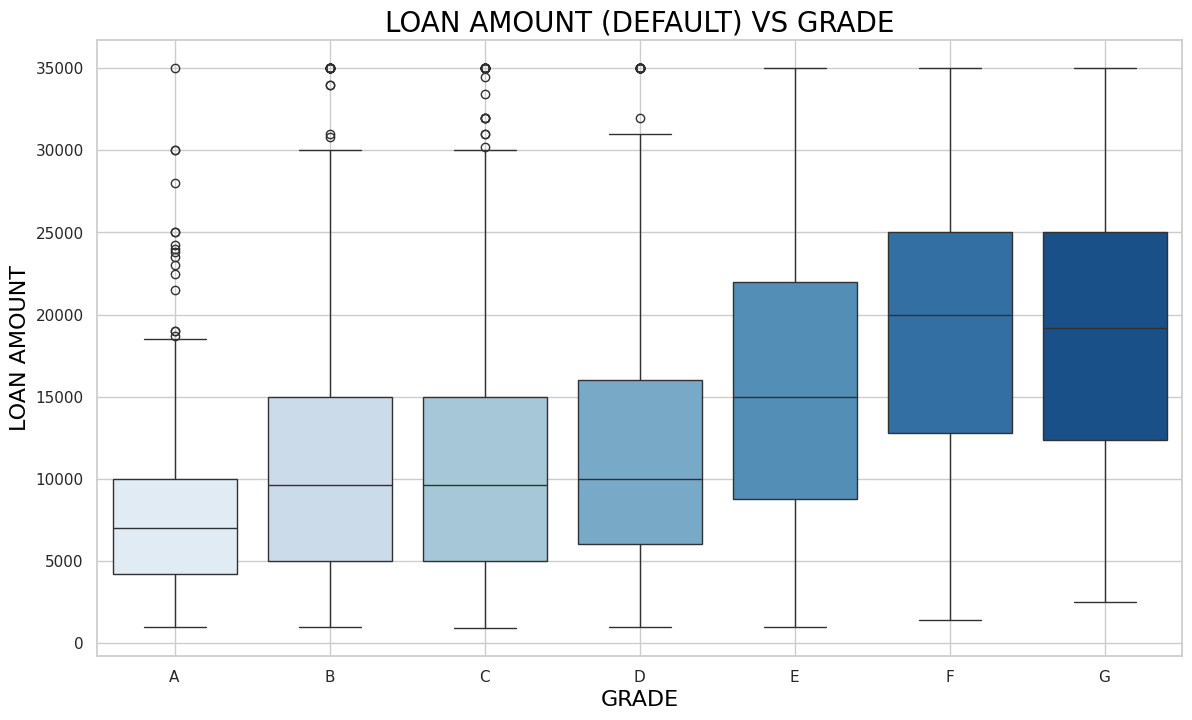

In [58]:
# Box plot for loan amount vs grade
plt.figure(figsize=(14,8))
viz = sns.boxplot(y='loan_amnt',
            x='grade',
            order=['A','B','C','D','E','F','G'],
            data=co_data,
            palette="Blues")

# Adding a grid for better readability
viz.grid(True)

# Adding shadow effect to each box
for i,artist in enumerate(viz.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*6,i*6+6):
        line = viz.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

# Naming the axis and title
viz.set_ylabel('LOAN AMOUNT', fontsize = 16, color = 'black')  # Increased font size
viz.set_xlabel('GRADE', fontsize = 16, color = 'black')  # Increased font size
viz.set_title('LOAN AMOUNT (DEFAULT) VS GRADE', fontsize=20, color='black')  # Increased font size

plt.show()

## **LOAN AMOUNT VS VERIFICATION STATUS**

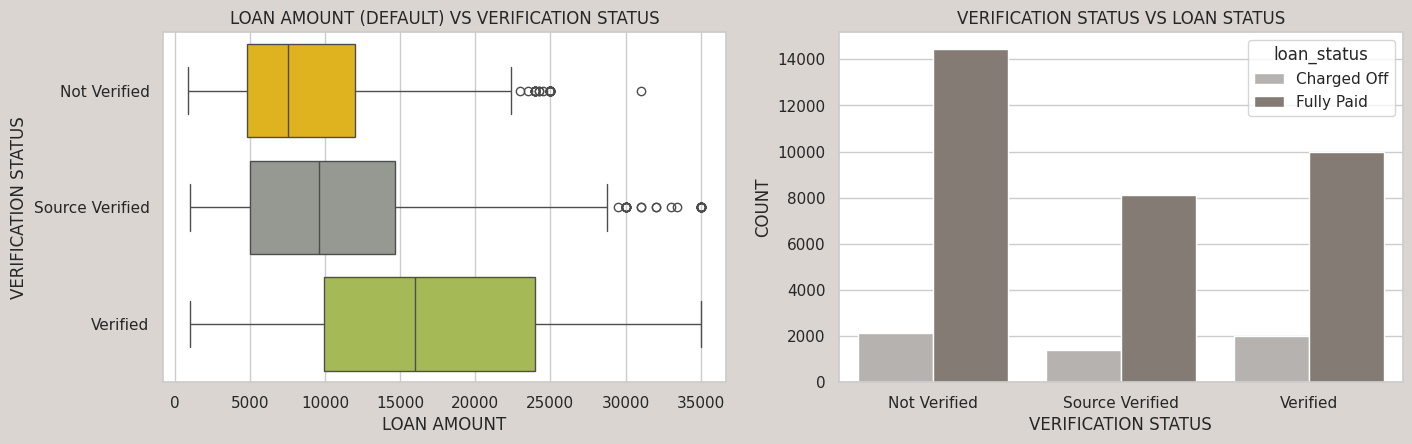

In [59]:
# Convert to category data type
co_data['verification_status'] = co_data['verification_status'].astype('category')
loan['loan_status'] = loan['loan_status'].astype('category')
loan['verification_status'] = loan['verification_status'].astype('category')

# Box plot for loan amount vs verification status
fig=plt.figure(figsize=(16,10))
bg_color = '#DAD5D1'
fig.set_facecolor(bg_color)
plt.subplot(2,2,1)
viz = sns.boxplot(x='loan_amnt',
            y='verification_status',
            palette=["#FFC300", '#979A90', "#AECB46"],
            data=co_data)
# Naming the axis and title
viz.set_xlabel('LOAN AMOUNT', fontsize = 12)
viz.set_ylabel('VERIFICATION STATUS', fontsize = 12)
viz.set_title('LOAN AMOUNT (DEFAULT) VS VERIFICATION STATUS')

# Count plot for verification status vs count by loan_status as hue
plt.subplot(2,2,2)
viz = sns.countplot(x='verification_status',
              hue='loan_status',
              palette=['#B6B2AF',"#877B71"],
              data = loan)
# Naming the axis and title
viz.set_xlabel('VERIFICATION STATUS', fontsize = 12)
viz.set_ylabel('COUNT', fontsize = 12)
viz.set_title('VERIFICATION STATUS VS LOAN STATUS')
plt.show()

In [60]:
loan["verification_status"].unique()

['Verified', 'Source Verified', 'Not Verified']
Categories (3, object): ['Not Verified', 'Source Verified', 'Verified']

## *INSTREST RATE VS INSTALLEMENT**

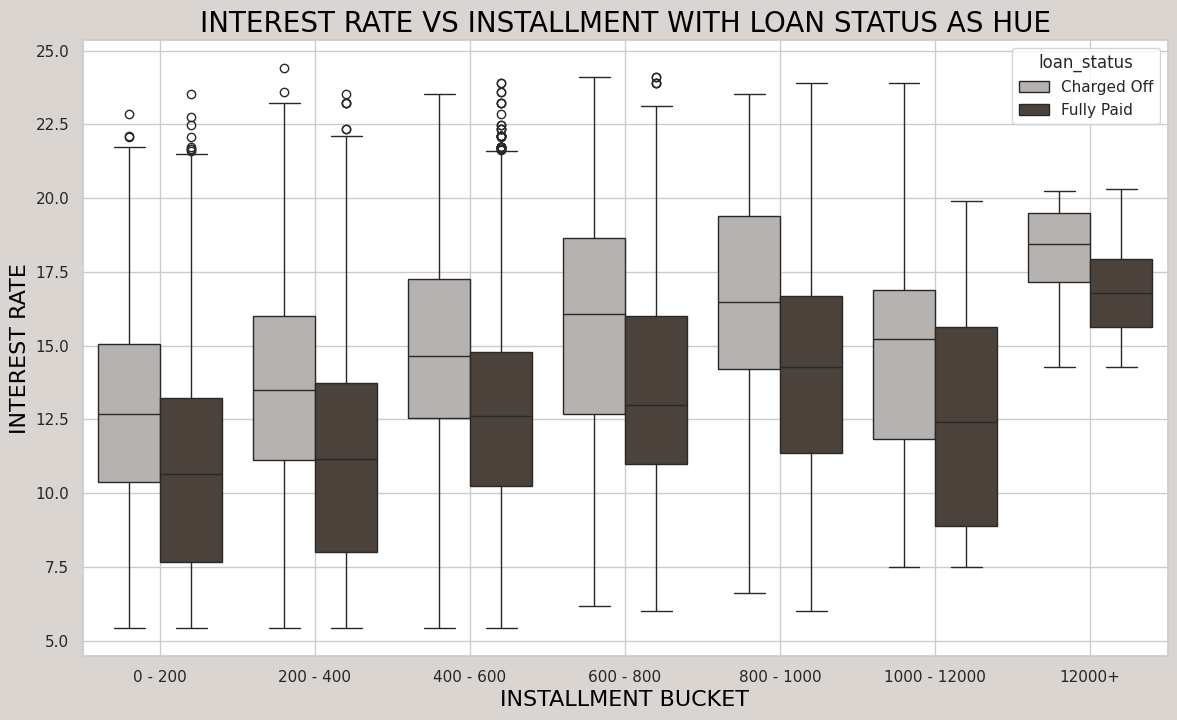

In [61]:
# Box plot for installment bucket vs interest rate by loan status as hue
fig = plt.figure(figsize=(14,8))
bg_color = '#DAD5D1'
fig.set_facecolor(bg_color)
viz = sns.boxplot(x='installment_bkt',
            y='int_rate',
            hue = 'loan_status',
            palette=['#B6B2AF', "#4C4239"],  # Changed color palette
            data=loan)

# Adding a grid for better readability
viz.grid(True)

# Naming the axis and title
viz.set_xlabel('INSTALLMENT BUCKET', fontsize = 16, color = 'black')  # Increased font size
viz.set_ylabel('INTEREST RATE', fontsize = 16, color = 'black')  # Increased font size
viz.set_title('INTEREST RATE VS INSTALLMENT WITH LOAN STATUS AS HUE', fontsize=20, color='black')  # Increased font size

plt.show()

## OBSERVATION FOR BIVARIATE ANALYSIS
1. **Employment Length**: Borrowers with an employment length of more than 10 years are more likely to default on their loans.

2. **Home Ownership**: Borrowers who have a mortgage and a loan amount greater than $12,000 are more likely to default.

3. **Loan Purpose**: Loans for debt consolidation, credit card payments, and small businesses with an average loan amount greater than $12,000 have a higher likelihood of default.

4. **Interest Rate**: Loans with the highest interest rates across all buckets are more likely to default.

5. **Loan Purpose and Interest Rate**: Loans provided for housing, debt consolidation, and small businesses that also have the highest interest rates are more likely to default.

6. **Loan Term and Interest Rate**:

  - For longer loan terms, borrowers with an interest rate  
    between 15-20% are more likely to default.
  - For shorter loan terms, borrowers with an interest rate
    between 10-15% are more likely to default.
7. **Loan Grade**: Borrowers within grades E, F, and G with an average loan amount greater than $15,000 are more likely to default.

8. **Verification Status and Loan Amount** : Borrowers with a "not-verified" verification status and a loan amount between
12,500 are more likely to default.

9. **Verification Status and Default Proportion**: Borrowers with "not-verified" and "verified" verification statuses have an equal proportion of defaults.

10. **Installments and Interest Rate**: As the number of installments increases, borrowers with high interest rates are more likely to default.

## **MULTIVARIATE ANALAYSIS**

In [62]:
co_data.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies', 'month', 'year', 'paid/default',
       'loan_amnt_bkt', 'int_rate_bkt', 'annual_inc_bkt', 'installment_bkt'],
      dtype='object')

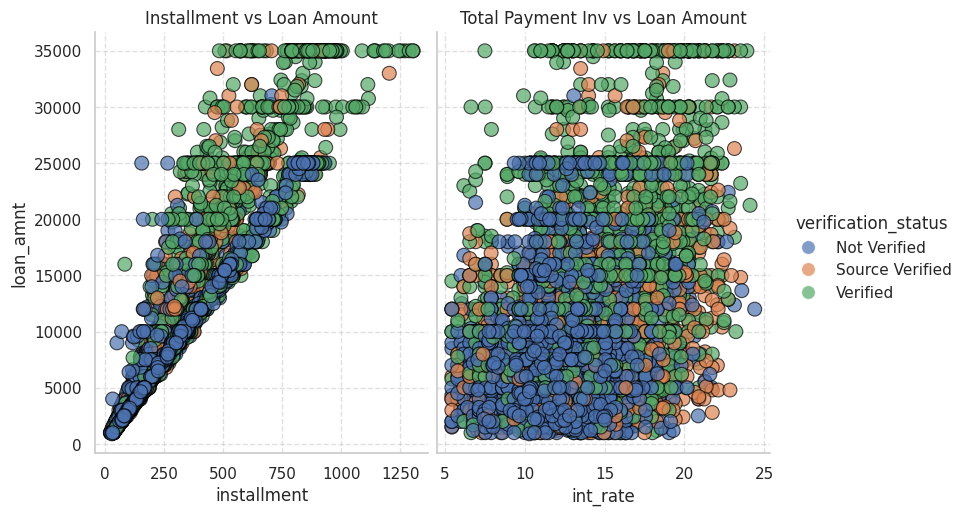

In [63]:
# Plotting a pair plot for 'installment', 'total_pymnt_inv', 'int_rate' vs loan amount by verification status
pairplot = sns.pairplot(co_data,
                        x_vars=['installment', 'int_rate'],
                        y_vars=['loan_amnt'],
                        diag_kind=None,
                        hue='verification_status',
                        height=5,
                        aspect=0.8,
                        kind='scatter',
                        plot_kws={'s': 100, 'edgecolor': 'white', 'alpha': 0.7})

# Adding a grid
for ax in pairplot.axes.flatten():
    ax.grid(True, linestyle='--', alpha=0.6)

# Adding titles
titles = ['Installment vs Loan Amount', 'Total Payment Inv vs Loan Amount', 'Interest Rate vs Loan Amount']
for ax, title in zip(pairplot.axes.flatten(), titles):
    ax.set_title(title)

# Creating a shadow effect
for ax in pairplot.axes.flatten():
    for line in ax.get_lines():
        line.set_color('black')
        line.set_zorder(0.5)

    for collection in ax.collections:
        collection.set_edgecolor('black')

plt.show()

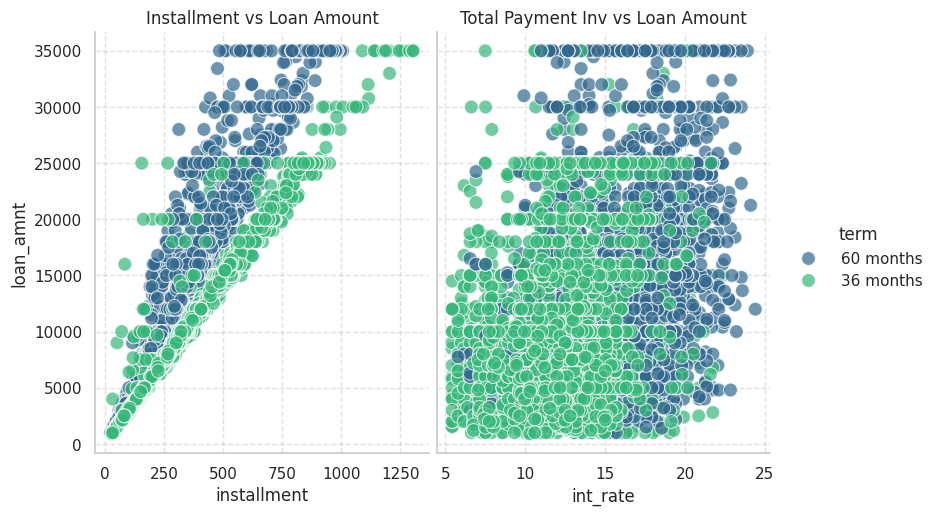

In [64]:
# Plotting a pair plot for 'installment', 'int_rate' vs loan amount by term as hue
pairplot = sns.pairplot(co_data,
                        x_vars=['installment', 'int_rate'],
                        y_vars=['loan_amnt'],
                        diag_kind=None,
                        hue='term',
                        height=5,
                        aspect=0.8,
                        kind='scatter',
                        plot_kws={'s': 100, 'edgecolor': 'white', 'alpha': 0.7},
                        palette='viridis')  # Change the color palette here

# Adding a grid
for ax in pairplot.axes.flatten():
    ax.grid(True, linestyle='--', alpha=0.6)

# Adding titles
titles = ['Installment vs Loan Amount', 'Total Payment Inv vs Loan Amount', 'Interest Rate vs Loan Amount']
for ax, title in zip(pairplot.axes.flatten(), titles):
    ax.set_title(title)

# Adding a legend
handles = pairplot._legend_data.values()
labels = pairplot._legend_data.keys()

plt.show()


#### OBSERVATION FOR MULTIVARIATE ANALYSIS

---

##### Correlation Heatmap Observations

- `loan_amnt` has a **strong positive correlation** with `installment` and `total_payment_inv`.
- `loan_amnt` has an **intermediate positive correlation** with `annual_inc`, `int_rate`, and `total_acc`.
- `open_acc` has a **strong positive correlation** with `total_acc`.
- `pub_rec` has a **strong positive correlation** with `pub_rec_bankruptcies`.


## **CONCLUSIONS**

##### OVERALL OBSERVATIONS

- As the `loan_amnt` increases, the number of `installment`, `total_pymnt_inv`, and `int_rate` also increase.

- Borrowers with a "Not-Verified" verification status are most likely to get a loan amount less than 25k (Charge off).

- Borrowers with a "Verified" verification status are most likely to get a loan amount greater than 25k (Charge off).

- Borrowers with a lower term have comparatively higher installments.

- Borrowers with a term of 60 months contribute the most to `total_pymnt_inv`

- Based on the nature of loan status most of the borrowers don’t undergo extensive verification.
- Borrowers face high interest rates who tend to choose longer installments plans.
- One thing to note the variation or spread in interest rate widens as the number of installments increases. This relates that lenders are adjust interests based on perceived risk associated with longer credit lines.
---

### 7. DRIVING FACTORS TO CHARGE OFF
---


##### Borrower Characteristics

- Borrowers with **high-interest rate credit lines**, and an **employment length greater than 10 years plus**.
- Borrowers who had a loan amount of **more than 12,000** and are living on a mortgage.

##### Loan Characteristics

- Loans for **debt consolidation**, **credit card**, and **small business** with a **loan amount greater than 12000**.
- Any loan amount given with an **average interest rate of more than 13%**.
- Loans provided for **house** purposes with an **average interest rate greater than 15%**.
- Any loan amount given with an **average interest rate of 12.5%** for tenure of **36 months**.
- Loans provided with an **average interest rate of 16.5%** for a **tenure of 60 months**.

##### Loan Amount and Grade

- **Average loan amount greater than 15000** with **grade E, F, G**.

##### Installment and Interest Rate

- **Installments between 800 - 12000**  at **average interest rate greater than 15%**.
- **Average interest rate of 17%** with an **installment greater than 12000**.

---